# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [37]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [38]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = len(Y_train)
    d = len(X_train[0])
    
    # Select values of X corresponding to Y=+/-1 and store them into new arrays X_minus and X_plus
    #Also find probabilities of y being +/-1.
    
    ii = np.where(Y_train==-1)
    p_y_plus = len(ii[0])/n
    X_minus = X_train[ii]
    del ii
    
    ii = np.where(Y_train==1)
    p_y_minus = len(ii[0])/n
    X_plus = X_train[ii]
    del ii
        
    mu_minus = np.mean(X_minus,axis=0)
    mu_plus = np.mean(X_plus,axis=0)
    
    I = np.eye(d)
    
    exp_term_1 = np.sum(((X_test-mu_plus)@I)*(X_test-mu_plus),axis=1)
    exp_term_2 = np.sum(((X_test-mu_minus)@I)*(X_test-mu_minus),axis=1)    
    
    term_1 = p_y_plus*((1/2*np.pi)**(0.5*d))*np.exp(-0.5*exp_term_1)
    term_2 = p_y_minus*((1/2*np.pi)**(0.5*d))*np.exp(-0.5*exp_term_2)
    
    eta = term_1/(term_1+term_2)
    Y_test_pred = np.sign(2*eta-1)
    
    return Y_test_pred

def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = len(Y_train)
    d = len(X_train[0])
    
    # Select values of X corresponding to Y=+/-1 and store them into new arrays X_minus and X_plus
    #Also find probabilities of y being +/-1.
    
    ii = np.where(Y_train==-1)
    p_y_plus = len(ii[0])/n
    X_minus = X_train[ii]
    
    ii = np.where(Y_train==1)
    p_y_minus = len(ii[0])/n
    X_plus = X_train[ii]
        
    mu_minus = np.mean(X_minus,axis=0)
    mu_plus = np.mean(X_plus,axis=0)
    
    # In assumption 1b, we have to assume that the covariance matrix is the same for all Y.
    # So we have obtained the covariance matrix for each Y individually and taken the weighted sum
    # This can be verified by taking log LL and differentiating. Here since cov is same for all Y,
    # the covariance matrix simply is sum of (X-mu_a)@(X-mu-a).T divided by total observations, 
    # where X-mu_a is a col vector(in the code it is a row vector so we have changed it accordingly)

    Sigma = (1/n)*(((X_plus-mu_plus).T)@(X_plus-mu_plus)+((X_minus-mu_minus).T)@(X_minus-mu_minus))
    
    Sigma_inv = np.linalg.inv(Sigma)
    
    exp_term_1 = np.sum((((X_test-mu_plus)@Sigma_inv)*(X_test-mu_plus)),axis=1)
    exp_term_2 = np.sum((((X_test-mu_minus)@Sigma_inv)*(X_test-mu_minus)),axis=1)    
    
    term_1 = p_y_plus*((1/2*np.pi)**(0.5*d))*np.exp(-0.5*exp_term_1)
    term_2 = p_y_minus*((1/2*np.pi)**(0.5*d))*np.exp(-0.5*exp_term_2)
    
    eta = term_1/(term_1+term_2)
    Y_test_pred = np.sign(2*eta-1)
    
    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    """
    n = len(Y_train)
    d = len(X_train[0])
    
    # Select values of X corresponding to Y=+/-1 and store them into new arrays X_minus and X_plus
    #Also find probabilities of y being +/-1.
    
    ii = np.where(Y_train==-1)
    p_y_plus = len(ii[0])/n
    X_minus = X_train[ii]
    
    ii = np.where(Y_train==1)
    p_y_minus = len(ii[0])/n
    X_plus = X_train[ii]
        
    mu_minus = np.mean(X_minus,axis=0)
    mu_plus = np.mean(X_plus,axis=0)
                                                            
    Sigma_plus = (1/len(X_plus))*(((X_plus-mu_plus).T)@(X_plus-mu_plus))
    Sigma_minus = (1/len(X_minus))*(((X_minus-mu_minus).T)@(X_minus-mu_minus))
    
    Sigma_plus_inv = np.linalg.inv(Sigma_plus)
    Sigma_minus_inv = np.linalg.inv(Sigma_minus)
    
    exp_term_1 = np.sum((((X_test-mu_plus)@Sigma_plus_inv)*(X_test-mu_plus)),axis=1)
    exp_term_2 = np.sum((((X_test-mu_minus)@Sigma_minus_inv)*(X_test-mu_minus)),axis=1)    
    
    term_1 = p_y_plus*((1/(np.sqrt(2*np.pi*np.linalg.det(Sigma_plus))))**(d))*np.exp(-0.5*exp_term_1)
    term_2 = p_y_minus*((1/(np.sqrt(2*np.pi*np.linalg.det(Sigma_minus))))**(d))*np.exp(-0.5*exp_term_2)
    
    eta = term_1/(term_1+term_2)
    Y_test_pred = np.sign(2*eta-1)
    
    return Y_test_pred

In [39]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


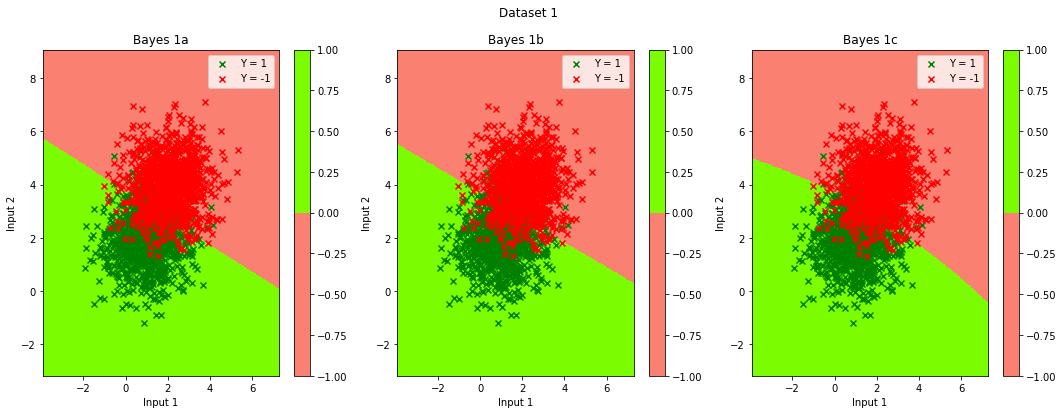

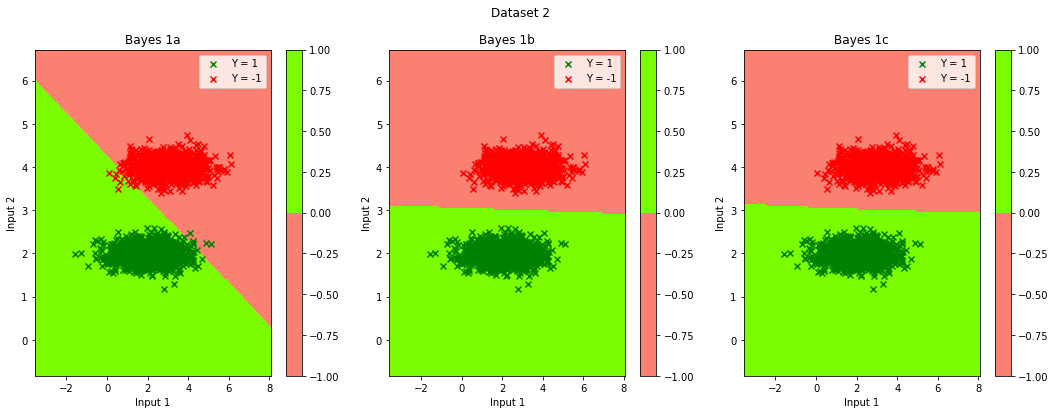

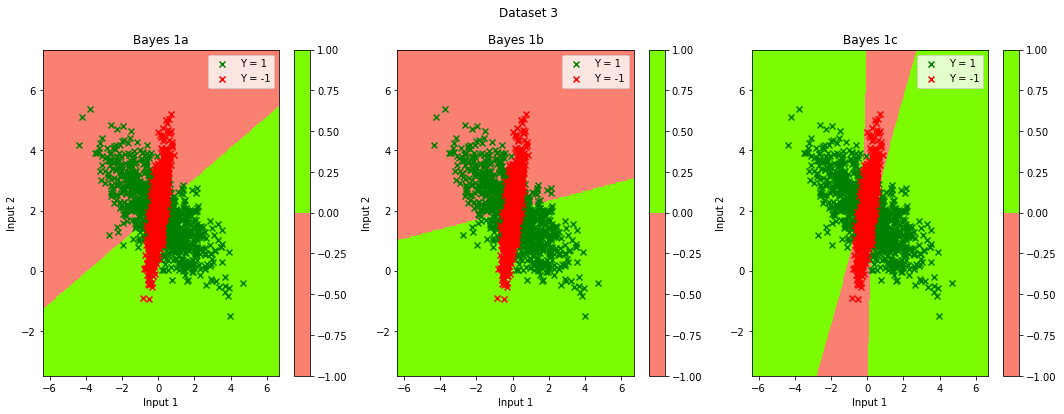

Error rate as a 3x3 matrix of tuples
First element in tuple is 1(True) and -1(Pred)
Second element tuple is -1(True) and 1(Pred)

Dataset1  (0.069, 0.057) (0.0675, 0.057) (0.067, 0.0585) 
Dataset2  (0.0035, 0.005) (0.0, 0.0) (0.0, 0.0) 
Dataset3  (0.2565, 0.2405) (0.252, 0.243) (0.148, 0.0045) 

In [40]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

#Plotting of decision boundaries for the three datasets, and calculating error rate.
err_rate = []
func_list = [Bayes1a,Bayes1b,Bayes1c]

for i in range(1,4):
    data = np.load('dataset1_'+str(i)+'.npz')
    lst = data.files
    
    X_train = data[lst[0]]
    Y_train = data[lst[1]]
    
    x1min = np.min(X_train[:,0])
    x1max = np.max(X_train[:,0])
    x2min = np.min(X_train[:,1])
    x2max = np.max(X_train[:,1])
    
    margin = 2.0
    spacing = 0.05
    
    x1 = np.arange(x1min-margin,x1max+margin,spacing)
    x2 = np.arange(x2min-margin,x2max+margin,spacing)
    n1 = len(x1)
    n2 = len(x2)
    
    X2, X1 = np.meshgrid(x2,x1)
    del x1, x2, x1min,x1max,x2min,x2max,margin,spacing
    
    X = np.c_[np.reshape(X1,(n1*n2,1)),np.reshape(X2,(n1*n2,1))]
    
    fig = plt.figure(figsize=(18,6))
    char_array = ['a','b','c']
    color_array = ['r','g']
    
    for j in range(3):
        Y_1_temp = func_list[j](X_train, Y_train, X)
        fig.add_subplot(1,3,j+1)
        
        cmap = colors.ListedColormap(['salmon','lawngreen'])
        norm= colors.Normalize(vmin=-1,vmax=1)
        im = plt.contourf(X1,X2,Y_1_temp.reshape((n1,n2)),cmap=cmap,norm=norm)
        
        ii = np.where(Y_train==1)
        plt.scatter(X_train[ii,0],X_train[ii,1],c='g',marker='x',label='Y = 1')
        ii = np.where(Y_train==-1)
        plt.scatter(X_train[ii,0],X_train[ii,1],c='r',marker='x',label='Y = -1')
        
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.title('Bayes 1'+char_array[j])
        plt.legend()
        fig.colorbar(im)
        
    plt.suptitle('Dataset '+str(i))    
    plt.show()
    del Y_1_temp
    del X, X1, X2, n1, n2
    
    X_test = data[lst[2]]
    Y_test = data[lst[3]]
    
    Y_pred_test_1a = Bayes1a(X_train,Y_train,X_test)
    Y_pred_test_1b = Bayes1b(X_train,Y_train,X_test)
    Y_pred_test_1c = Bayes1c(X_train,Y_train,X_test)
    
    temp = Y_test+2*Y_pred_test_1a
    ii = np.where(temp==-1)
    a1 = len(ii[0])/len(Y_test)
    ii = np.where(temp==1)
    a2 = len(ii[0])/len(Y_test)
    del temp
    temp = Y_test+2*Y_pred_test_1b
    ii = np.where(temp==-1)
    b1 = len(ii[0])/len(Y_test)
    ii = np.where(temp==1)
    b2 = len(ii[0])/len(Y_test)
    del temp
    temp = Y_test+2*Y_pred_test_1c
    ii = np.where(temp==-1)
    c1 = len(ii[0])/len(Y_test)
    ii = np.where(temp==1)
    c2 = len(ii[0])/len(Y_test)
    del temp
    
    err_rate.append([(a1,a2),(b1,b2),(c1,c2)])
    del X_test, Y_test, Y_pred_test_1a,Y_pred_test_1b,Y_pred_test_1c, a1, a2, b1, b2, c1, c2, ii
    del X_train, Y_train
    
    
    
print('Error rate as a 3x3 matrix of tuples')
print('First element in tuple is 1(True) and -1(Pred)')
print('Second element tuple is -1(True) and 1(Pred)')
for i in range(3):
    print('\nDataset'+str(i+1),end = "  ")
    for j in range(3):
        print(err_rate[i][j],end=" ")
del err_rate, func_list, data, lst, color_array

1. The error matrix as a 3x3 matrix of tuples is given as:

$\begin{pmatrix} (0.069, 0.057)&(0.0675, 0.057)&(0.067, 0.0585)\\(0.0035, 0.005)&(0.0, 0.0)&(0.0, 0.0)\\(0.2565, 0.2405)&(0.252, 0.243)&(0.148, 0.0045)\end{pmatrix}$.

The rows represent datasets, columns represent algorithms. The first element of the tuples represents frequency of 1 classified as -1 and second represents -1 classified as 1.

A modified error matrix that only gives the total error is given by:

$\begin{pmatrix} 0.126&0.1245&0.01255\\0.0085&0.0&0.0\\0.4970,&0.495&0.1525\end{pmatrix}$.

2. Without looking at the data one can say that model 3 should generalise well since it assumes the most general form(among the three) for the input-output relationship, allowing for different conditional mean and covariances. The seond model is more general than the first, allowing for any covariance as long as it is same for both distributions, and the first is probably only useful when we care about the mean and know that not only the conditional covariance is diagonal, but equal to identity.

3. From the scatter plots of training data, one can observe that for training dataset:
    1. Training dataset 1: Has not only same conditional covariances for both Ys, but the covariance matrices are diagonal as well. Since all models seem to give similar performance, we conclude that the conditional covariances are close to identity.
    2. Training sataset 2: Here we can infer from the scatter plot that the conditonal covariances look similar for both Ys, but there is a stretch along one axis more than the other. No wonder model 1 fails poorly.
    3. Training dataset 3: Here it seems that the conditional means are approximately equal. The conditional covariances are unequal and are also oriented along different axes.


4. Conic section decision surfaces: For a 2 dimensional data, with general covariance and mean, the decision surfaces are parabolas, hyoerbolas or straight lines(can be thought of as limit of hyperbola). This is very evident from plot of model 3 for dataset 3, where the decision boundary is a hyperbola


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [41]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = len(X_train)
    d = len(X_train[0])
    k = 4 #Number of distinct output Y values
    m = len(X_test)
    
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]]) #Loss Matrix
    
    P_Y = np.zeros((k)) #This array stores the no of Y = i in 1 to 4
    mu = np.zeros((k,d))
    term = np.zeros((m,k))
    
    for i in range(k):
        ii = np.where(Y_train==i+1)
        P_Y[i] = len(ii[0])/n
        mu[i] = np.mean(X_train[ii],axis=0)
        X_ = X_train[ii]-np.tile(mu[i],len(X_train[ii])).reshape(len(X_train[ii]),d)
        I = np.eye(d)
        del ii        
        exp = np.sum((((X_test-mu[i])@I)*(X_test-mu[i])),axis=1)
        term[:,i] = (1/(np.sqrt(2*np.pi)))*np.exp(-0.5*exp)
    
    norm = np.sum(term,axis=1)
    eta = term/np.reshape(np.tile(norm,k),(m,k),order='F')
    Y_test = np.argmin(eta@L,axis=1)+1
    return Y_test
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = len(X_train)
    d = len(X_train[0])
    k = 4 #Number of distinct output Y values
    m = len(X_test)
    
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]]) #Loss Matrix
    
    P_Y = np.zeros((k)) #This array stores the no of Y = i in 1 to 4
    mu = np.zeros((k,d))
    Sigma = np.zeros((d,d))
    term = np.zeros((m,k))
    
    for i in range(k):
        ii = np.where(Y_train==i+1)
        P_Y[i] = len(ii[0])/n
        mu[i] = np.mean(X_train[ii],axis=0)
        X_ = X_train[ii]-np.tile(mu[i],len(X_train[ii])).reshape(len(X_train[ii]),d)
        Sigma+=((X_).T)@X_
        del ii
    
    # In assumption 2b, we have to assume that the covariance matrix is the same for all Y.
    # So we have obtained the covariance matrix for each Y individually and taken the weighted sum
    # This can be verified by taking log LL and differentiating. Here since cov is same for all Y,
    # the covariance matrix simply is sum of (X-mu_a)@(X-mu-a).T divided by total observations, 
    # where X-mu_a is a col vector(in the code it is a row vector so we have changed it accordingly)
    
    Sigma = (1/n)*Sigma
    Sigma_inv = np.linalg.inv(Sigma)
    
    for i in range(k):
        exp = np.sum((((X_test-mu[i])@Sigma_inv)*(X_test-mu[i])),axis=1)
        term[:,i] = (1/(np.sqrt(2*np.pi*np.linalg.det(Sigma))))*np.exp(-0.5*exp)
    
    norm = np.sum(term,axis=1)
    eta = term/np.reshape(np.tile(norm,k),(m,k),order='F')
    Y_test = np.argmin(eta@L,axis=1)+1
    return Y_test

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = len(X_train)
    d = len(X_train[0])
    k = 4 #Number of distinct output Y values
    m = len(X_test)
    
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]]) #Loss Matrix
    
    P_Y = np.zeros((k)) #This array stores the no of Y = i in 1 to 4
    mu = np.zeros((k,d))
    Sigma = np.zeros((k,d,d))
    term = np.zeros((m,k))
    
    for i in range(k):
        ii = np.where(Y_train==i+1)
        P_Y[i] = len(ii[0])/n
        mu[i] = np.mean(X_train[ii],axis=0)
        X_ = X_train[ii]-np.tile(mu[i],len(X_train[ii])).reshape(len(X_train[ii]),d)
        Sigma[i] = (1/len(ii[0]))*((X_).T)@X_
        del ii        
        exp = np.sum((((X_test-mu[i])@np.linalg.inv(Sigma[i]))*(X_test-mu[i])),axis=1)
        term[:,i] = (1/(np.sqrt(2*np.pi*np.linalg.det(Sigma[i]))))*np.exp(-0.5*exp)
    
    norm = np.sum(term,axis=1)
    eta = term/np.reshape(np.tile(norm,k),(m,k),order='F')
    Y_test = np.argmin(eta@L,axis=1)+1
    return Y_test

In [42]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


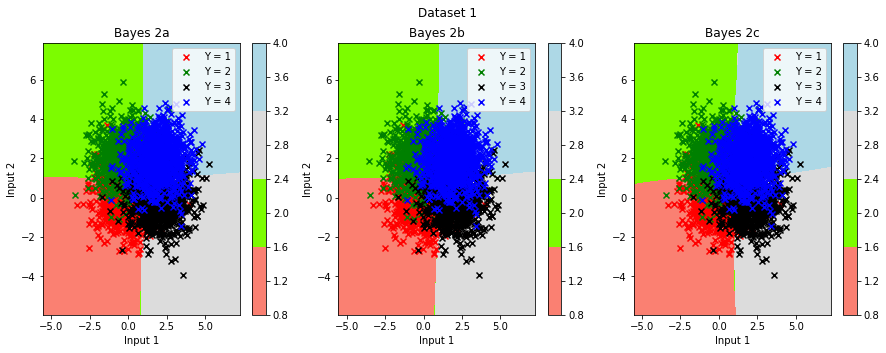

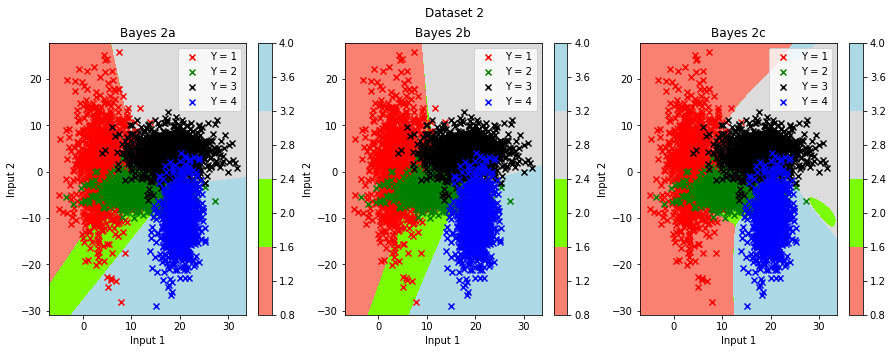

Dataset1

Confusion matrix for Bayes 2a
[[0.15825 0.05475 0.034   0.003  ]
 [0.02425 0.1845  0.0155  0.02575]
 [0.0215  0.01225 0.1925  0.02375]
 [0.00375 0.034   0.0485  0.16375]]

Expected loss for Bayes 2a
0.42975

Confusion matrix for Bayes 2b
[[0.15825 0.0545  0.03425 0.003  ]
 [0.02375 0.18575 0.015   0.0255 ]
 [0.021   0.01225 0.19325 0.0235 ]
 [0.004   0.03425 0.049   0.16275]]

Expected loss for Bayes 2b
0.429

Confusion matrix for Bayes 2c
[[0.1585  0.05425 0.0345  0.00275]
 [0.02475 0.1855  0.01525 0.0245 ]
 [0.02175 0.01175 0.193   0.0235 ]
 [0.00375 0.0335  0.05025 0.1625 ]]

Expected loss for Bayes 2c
0.42775
Dataset2

Confusion matrix for Bayes 2a
[[0.2075  0.0375  0.0045  0.0005 ]
 [0.02325 0.196   0.0115  0.01925]
 [0.0075  0.01525 0.22625 0.001  ]
 [0.      0.00575 0.0195  0.22475]]

Expected loss for Bayes 2a
0.1835

Confusion matrix for Bayes 2b
[[0.22275 0.0265  0.00075 0.     ]
 [0.02975 0.17275 0.031   0.0165 ]
 [0.00575 0.0265  0.216   0.00175]
 [0.      0.00125

In [43]:
conf_matrix = np.zeros((2,3,4,4)) #First index is no. of datasets, second is no. of algos, next 2 are no of Ys
expect_loss = np.zeros((2,3)) # First is no. of datasets, second is no. of algos.
func_list = [Bayes2a,Bayes2b,Bayes2c] #List with functions as elements to iterate over inside.

for i in range(1,3):
    data = np.load('dataset2_'+str(i)+'.npz')
    lst = data.files
    
    X_train = data[lst[0]]
    Y_train = data[lst[1]]
    
    x1min = np.min(X_train[:,0])
    x1max = np.max(X_train[:,0])
    x2min = np.min(X_train[:,1])
    x2max = np.max(X_train[:,1])
    
    margin = 2.0
    spacing = 0.05
    
    x1 = np.arange(x1min-margin,x1max+margin,spacing)
    x2 = np.arange(x2min-margin,x2max+margin,spacing)
    n1 = len(x1)
    n2 = len(x2)
    del x1min, x1max, x2min, x2max, margin, spacing
    
    X2, X1 = np.meshgrid(x2,x1)
    del x1, x2
    X = np.c_[np.reshape(X1,(n1*n2,1)),np.reshape(X2,(n1*n2,1))]
    
    fig = plt.figure(figsize=(15,5))
    
    char_array = ['a','b','c']
    color_array = ['r','g','k','b']
    
    for j in range(3):
        Y_2_temp = func_list[j](X_train, Y_train, X)
        
        fig.add_subplot(1,3,j+1)
        
        cmap = colors.ListedColormap(['salmon','lawngreen','gainsboro','lightblue'])
        norm= colors.Normalize(vmin=1,vmax=4)
        im = plt.contourf(X1,X2,Y_2_temp.reshape((n1,n2)),cmap=cmap,norm=norm)
        
        for k in range(1,5):
            ii = np.where(Y_train==k)
            plt.scatter(X_train[ii,0],X_train[ii,1],c=color_array[k-1],marker='x',label='Y = '+str(k))
            plt.legend()
        
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.title('Bayes 2'+char_array[j])
        fig.colorbar(im)
        
    plt.suptitle('Dataset '+str(i))
    plt.show()
    
    del Y_2_temp
    del X, X1, X2, n1, n2
    
    X_test = data[lst[2]]
    Y_test = data[lst[3]]
    
    Y_pred = np.zeros((3,len(X_test)))
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    
    for j in range(3):
        Y_pred[j] = func_list[j](X_train,Y_train,X_test)
        
    for k in range(3):
        for j in range(len(Y_test)):
            conf_matrix[i-1,k,int(Y_test[j]-1),int(Y_pred[k][j])-1]+=1
        
        expect_loss[i-1,k] = np.sum(conf_matrix[i-1,k]*L)
    
    conf_matrix[i-1] = conf_matrix[i-1]/len(Y_test)
    expect_loss[i-1] = expect_loss[i-1]/len(Y_test)
    del X_train, Y_train, Y_test, X_test, Y_pred

for i in range(2):
    print('===================')
    print('Dataset'+str(i+1))
    for j in range(3):
        print('\nConfusion matrix for Bayes 2'+char_array[j])
        print(conf_matrix[i][j])
        print('\nExpected loss for Bayes 2'+char_array[j])
        print(expect_loss[i][j])
        
del conf_matrix, expect_loss, color_array, func_list, data, lst, L

#### Observations:

1. Again, here too we can say that algorithm 2c>2b>2a in terms of capacity to generalise because it allows for different conditional mean and covariance matrices.

2. From the scatter plot for the training data one can see that for dataset 1, the conditional covariances are roughly diagonal. Since the decision boundaries for each of the algorithms are approximately similar, one can conlude that conditonal covariances are close to identity, since model 2a is the most restrictive. This is verified by looking at the expected loss and confusion matrices, which are not very different for each of the algos.

3. For dataset 2, there is a clear winner: Bayes 2c. It manages to correctly identify the decision regions, particularly the Y=2 region which is a closed shape, while other two algos give a poor open region estimate for Y=2. The expected loss too, is much lesser for 2c. For 2b and 2a, it is roughly same, meaning the conditional covariance matrix estimated in 2b is not that far off from identity

##### Expected loss table:

|Dataset/Algorithm| Bayes 2a| Bayes 2b| Bayes 2c|
|-----------------|---------|---------|---------|
|Dataset 1        |0.42975  |0.429    |0.42775  |
|Dataset 2        |0.1835   |0.1895   |0.14075  |

#### Confusion matrices:

##### Dataset1

Confusion matrix for Bayes 2a

$\begin{pmatrix}0.15825&0.05475&0.034 &  0.003  \\
 0.02425& 0.1845  &0.0155  &0.02575\\
 0.0215  &0.01225& 0.1925 & 0.02375\\
 0.00375 &0.034   &0.0485&  0.16375\end{pmatrix}$

Confusion matrix for Bayes 2b

$\begin{pmatrix}0.15825&0.0545&0.03425 &0.003 \\
0.02375 &0.18575& 0.015   &0.0255 \\
0.021  & 0.01225 &0.19325& 0.0235 \\
0.004 &  0.03425 &0.049&   0.16275\end{pmatrix}$


Confusion matrix for Bayes 2c

$\begin{pmatrix} 0.1585  &0.05425& 0.0345  &0.00275\\
0.02475 &0.1855  &0.01525 &0.0245 \\
0.02175 &0.01175 &0.193   &0.0235 \\
0.00375 &0.0335  &0.05025 &0.1625 \end{pmatrix}$


##### Dataset2

Confusion matrix for Bayes 2a

$\begin{pmatrix}0.2075 & 0.0375 & 0.0045 & 0.0005 \\
0.02325& 0.196 &  0.0115 & 0.01925\\
0.0075 & 0.01525 &0.22625 &0.001  \\
0.     & 0.00575 &0.0195 & 0.22475\end{pmatrix}$

Confusion matrix for Bayes 2b

$\begin{pmatrix}0.22275 & 0.0265 & 0.00075 &0.     \\
0.02975 &0.17275& 0.031 &  0.0165 \\
0.00575& 0.0265 & 0.216  & 0.00175\\
0.     & 0.00125& 0.0255 & 0.22325\end{pmatrix}$


Confusion matrix for Bayes 2c

$\begin{pmatrix}0.22525& 0.02  &  0.00475 0.     \\
0.016  & 0.206  & 0.0115  &0.0165 \\
0.00475 &0.00775& 0.234  & 0.0035 \\
0.     & 0.009  & 0.012   &0.229  \end{pmatrix}$

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




Degree= 1 lambda= 1e-07


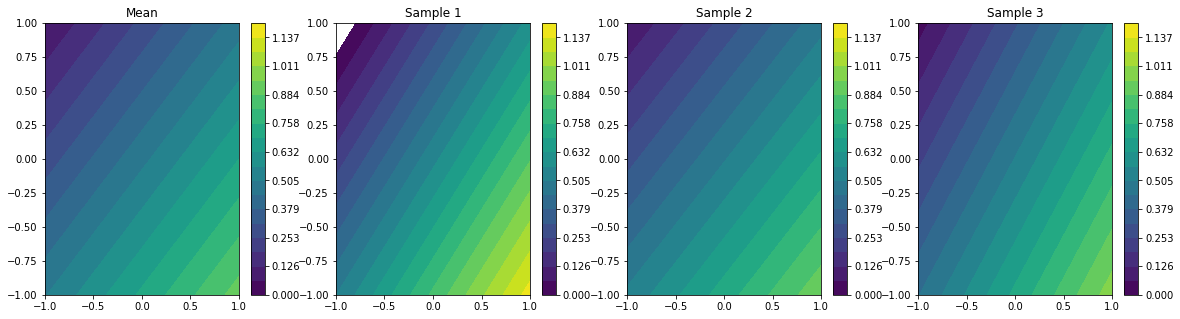

Bias = 0.05517448422637599  Variance = 0.003348156022554463  MSE = 0.05852264024893047
Degree= 1 lambda= 1e-05


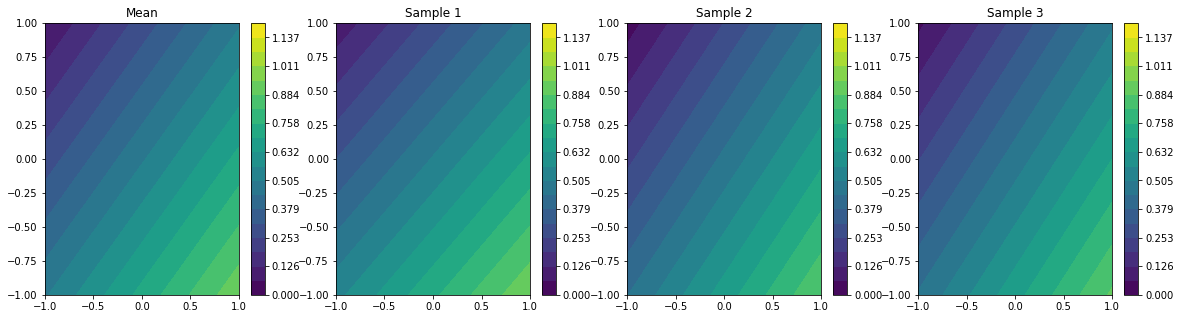

Bias = 0.055091209233543485  Variance = 0.003846465736793233  MSE = 0.058937674970336716
Degree= 1 lambda= 0.001


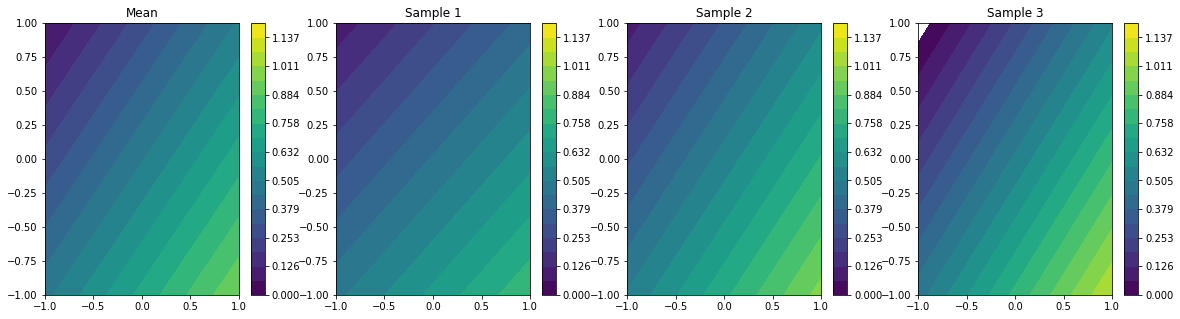

Bias = 0.05516618434300967  Variance = 0.004169423100861393  MSE = 0.059335607443871084
Degree= 1 lambda= 0.1


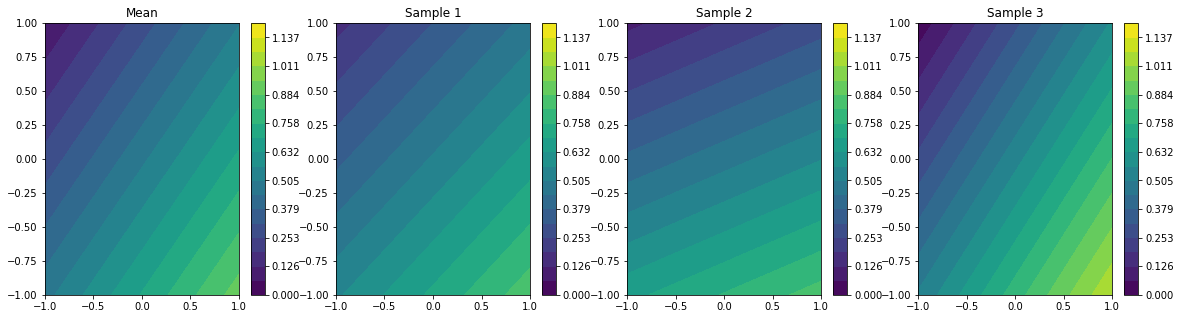

Bias = 0.05512167931779447  Variance = 0.0032374284437439054  MSE = 0.058359107761538374
Degree= 1 lambda= 10.0


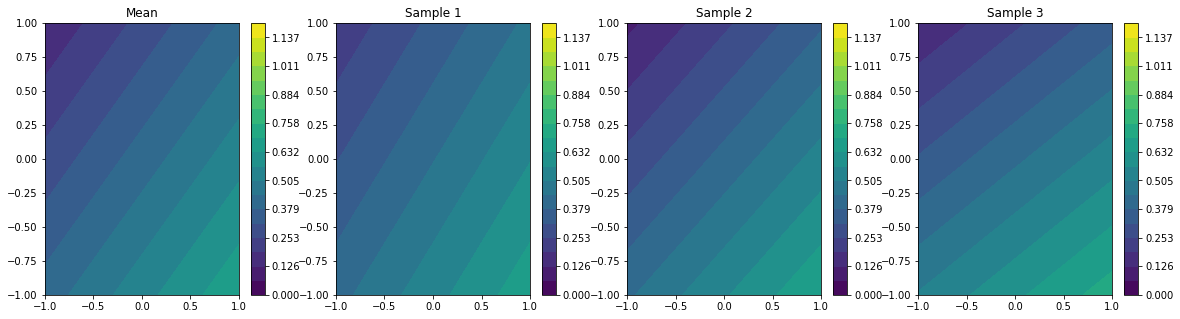

Bias = 0.06680470422640988  Variance = 0.0016074889174714855  MSE = 0.06841219314388142
Degree= 1 lambda= 1000.0


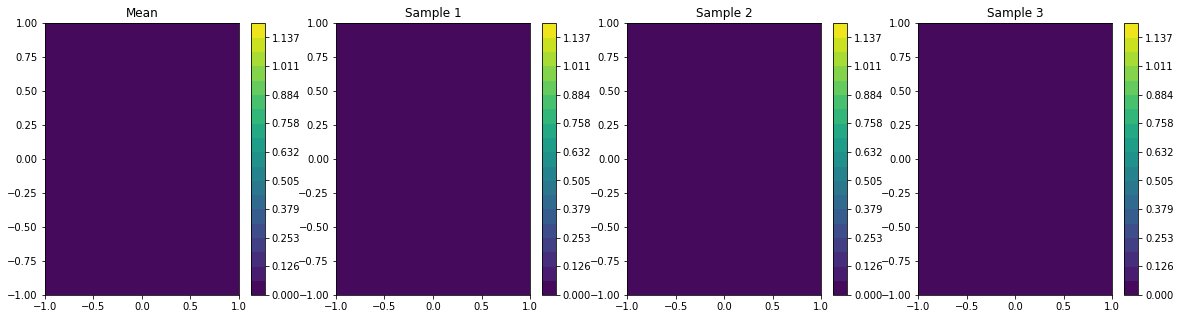

Bias = 0.30803043426215193  Variance = 7.109725693062157e-06  MSE = 0.30803754398784494
Degree= 2 lambda= 1e-07


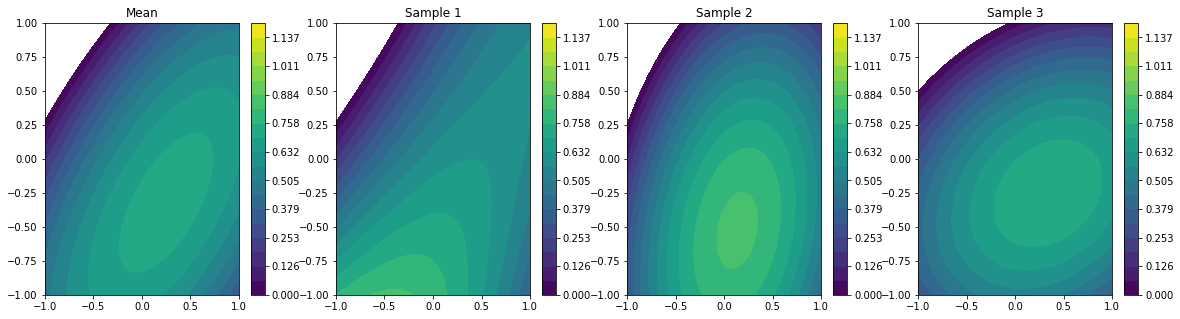

Bias = 0.03472683783646975  Variance = 0.005954617733047225  MSE = 0.040681455569516974
Degree= 2 lambda= 1e-05


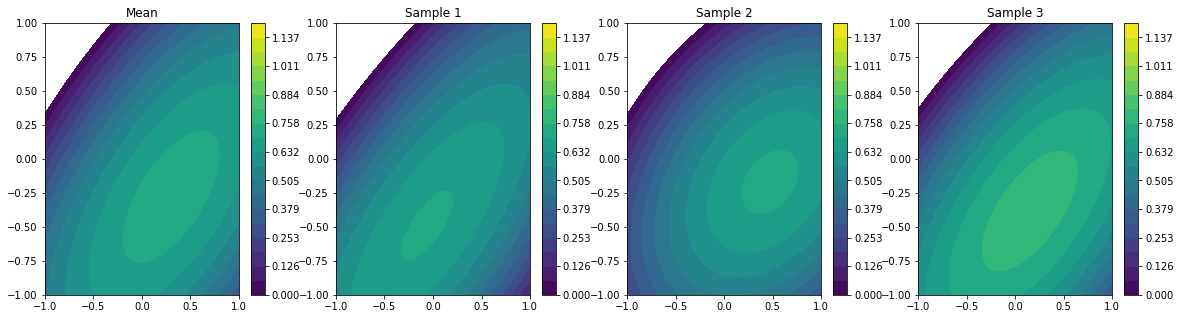

Bias = 0.034624052315162385  Variance = 0.005450483352300642  MSE = 0.04007453566746302
Degree= 2 lambda= 0.001


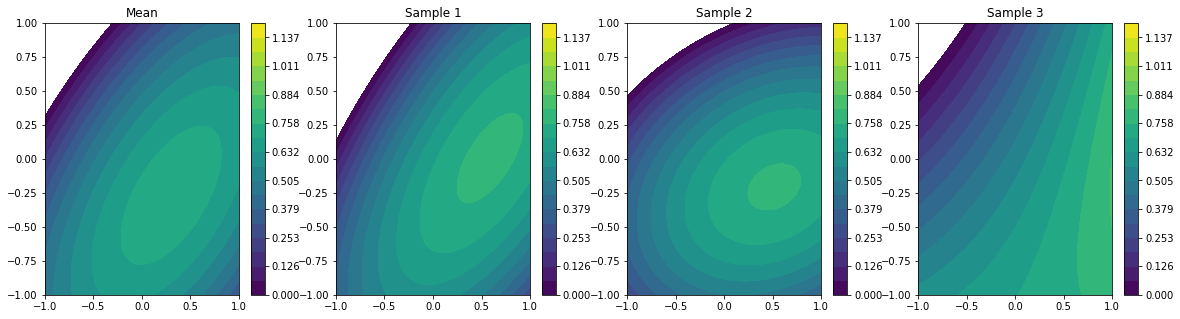

Bias = 0.034642508076686174  Variance = 0.005273044368836488  MSE = 0.039915552445522674
Degree= 2 lambda= 0.1


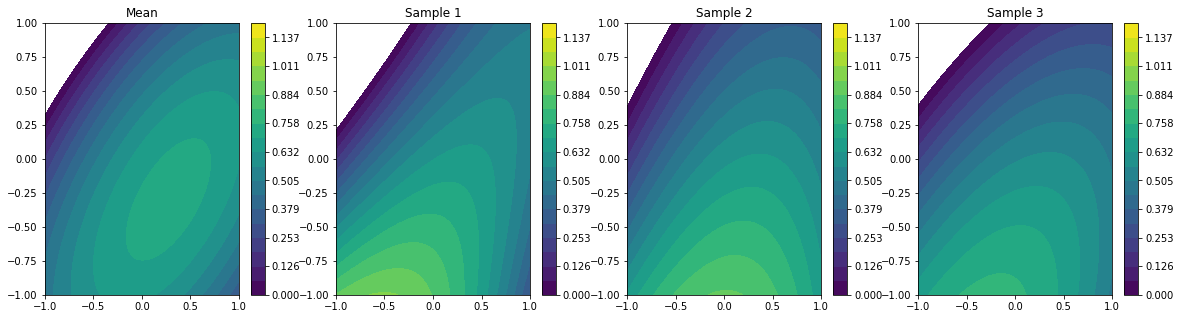

Bias = 0.03447912703172891  Variance = 0.005269740833784098  MSE = 0.03974886786551301
Degree= 2 lambda= 10.0


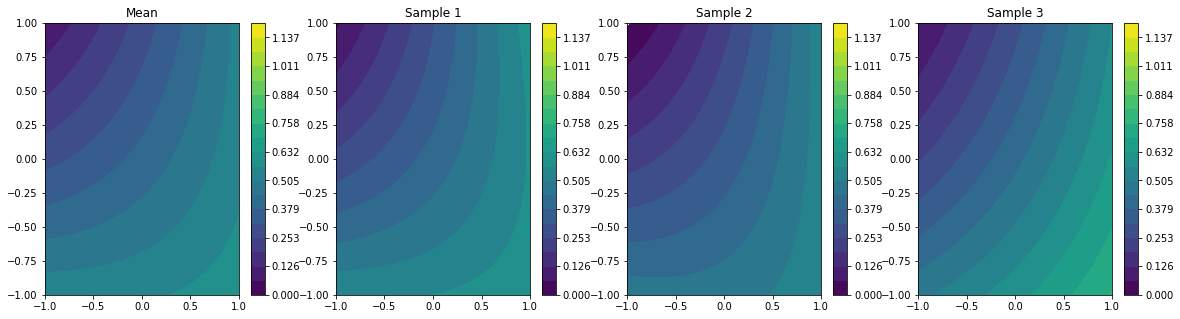

Bias = 0.06283092928335496  Variance = 0.0019035360730830498  MSE = 0.064734465356438
Degree= 2 lambda= 1000.0


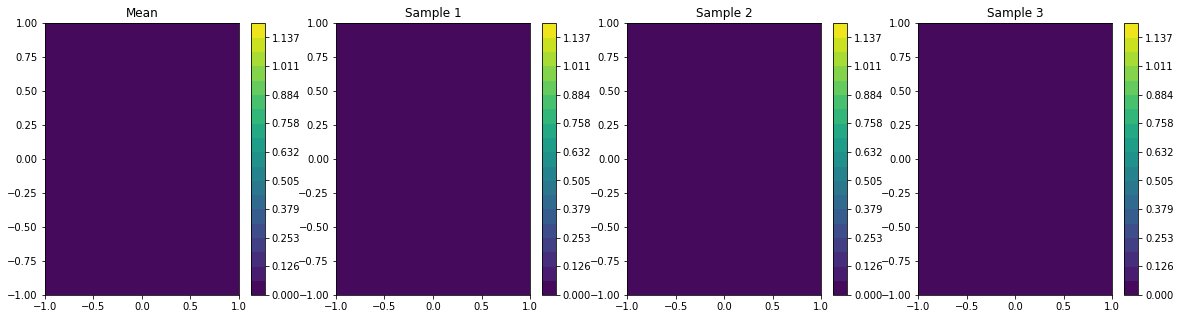

Bias = 0.3038839359917797  Variance = 7.449388148217453e-06  MSE = 0.30389138537992777
Degree= 4 lambda= 1e-07


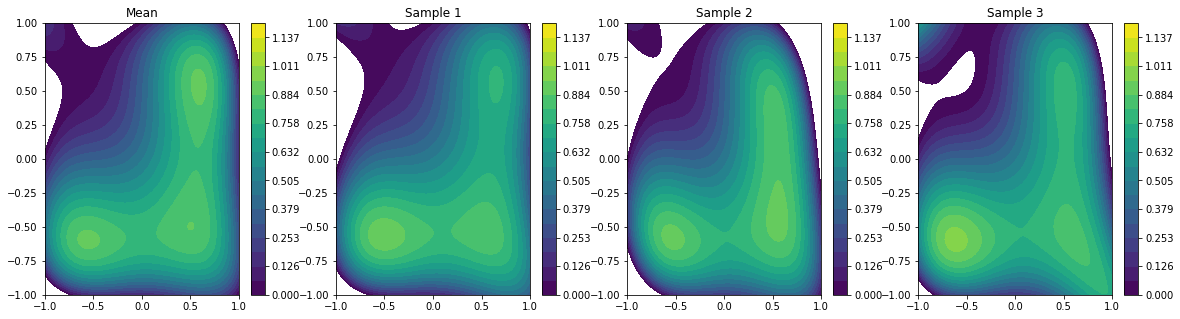

Bias = 0.00787020681841078  Variance = 0.008494057235458817  MSE = 0.016364264053869596
Degree= 4 lambda= 1e-05


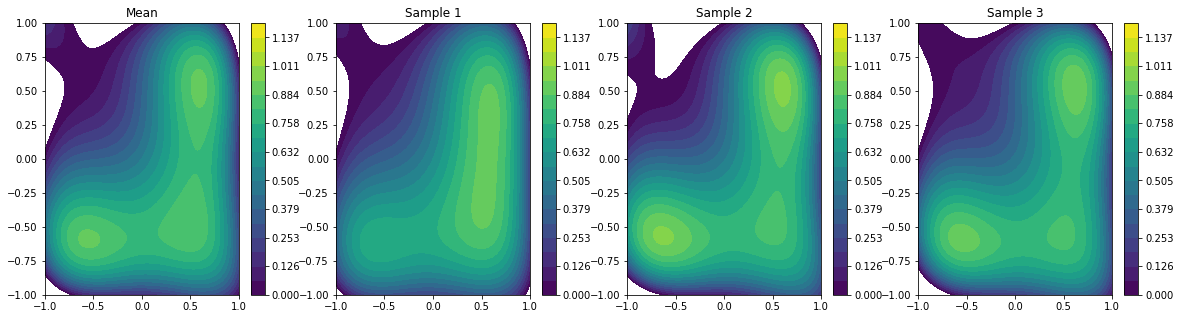

Bias = 0.007798956843645146  Variance = 0.008863772141318867  MSE = 0.016662728984964015
Degree= 4 lambda= 0.001


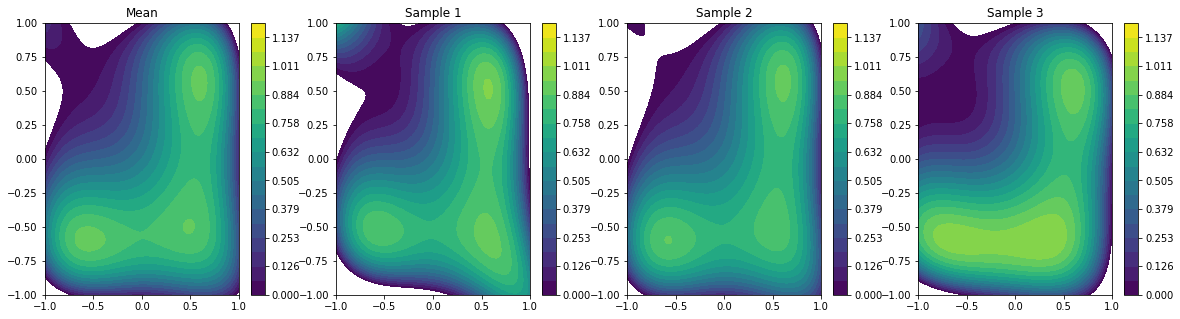

Bias = 0.007338443316893816  Variance = 0.0068656638254006  MSE = 0.014204107142294411
Degree= 4 lambda= 0.1


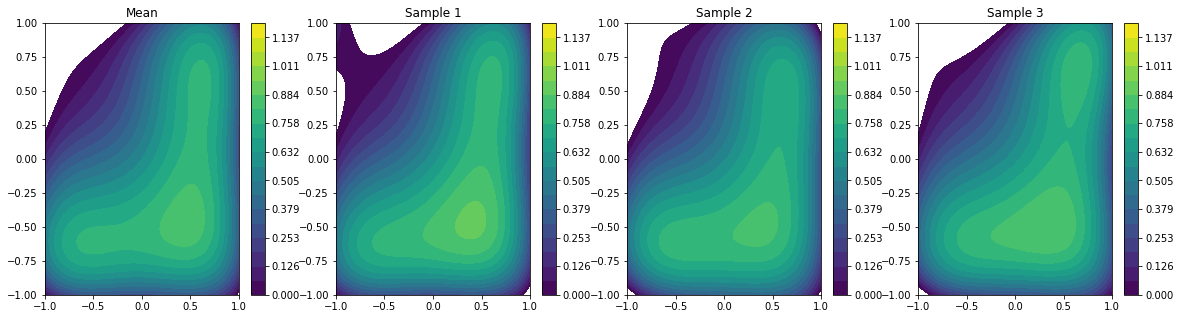

Bias = 0.00931652497134815  Variance = 0.004195026124102674  MSE = 0.013511551095450821
Degree= 4 lambda= 10.0


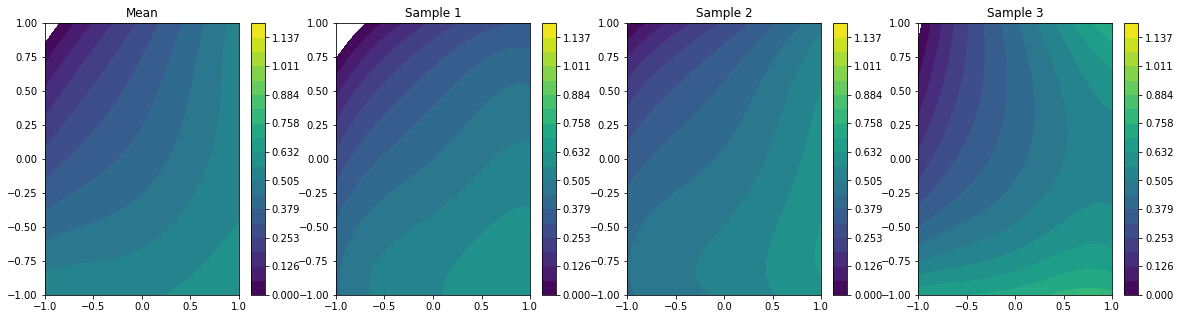

Bias = 0.060217960647044856  Variance = 0.001995359253436099  MSE = 0.06221331990048094
Degree= 4 lambda= 1000.0


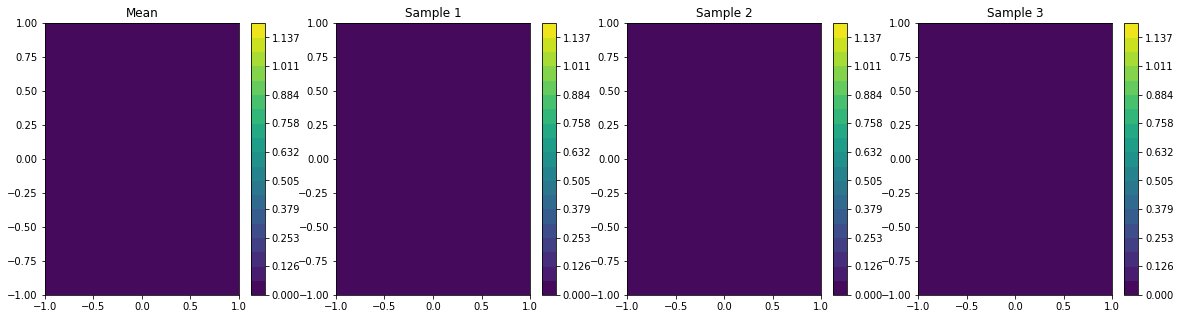

Bias = 0.3025533946350519  Variance = 1.0856194875709618e-05  MSE = 0.30256425082992766
Degree= 8 lambda= 1e-07


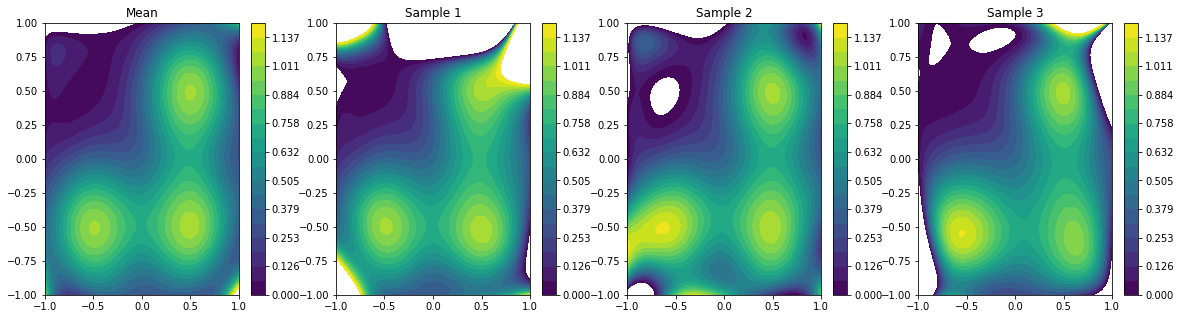

Bias = 0.005909364068417804  Variance = 0.20681822456123145  MSE = 0.21272758862964933
Degree= 8 lambda= 1e-05


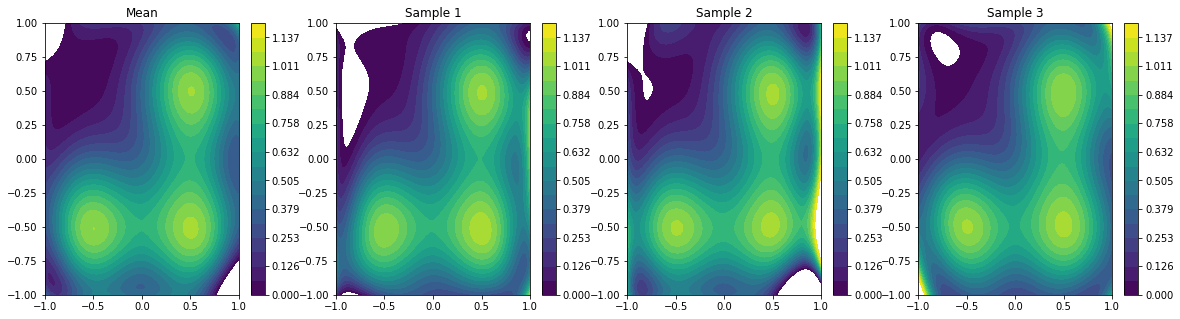

Bias = 0.004942776960032933  Variance = 0.05795439764000894  MSE = 0.06289717460004188
Degree= 8 lambda= 0.001


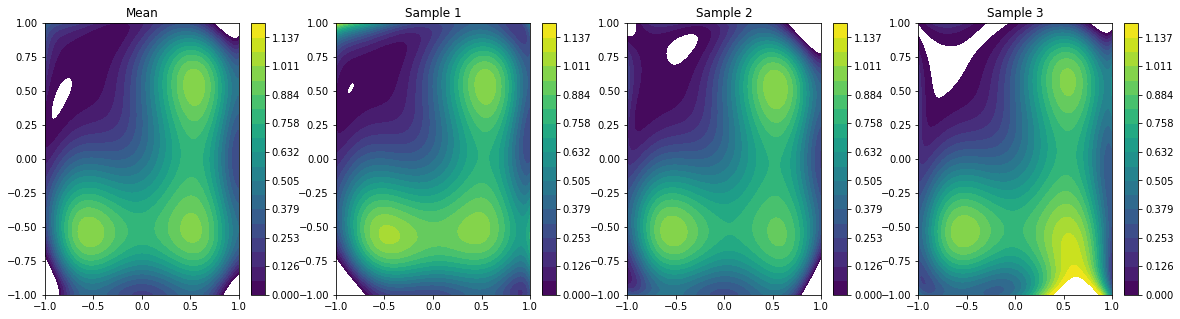

Bias = 0.005604018022124441  Variance = 0.020963800333424903  MSE = 0.02656781835554933
Degree= 8 lambda= 0.1


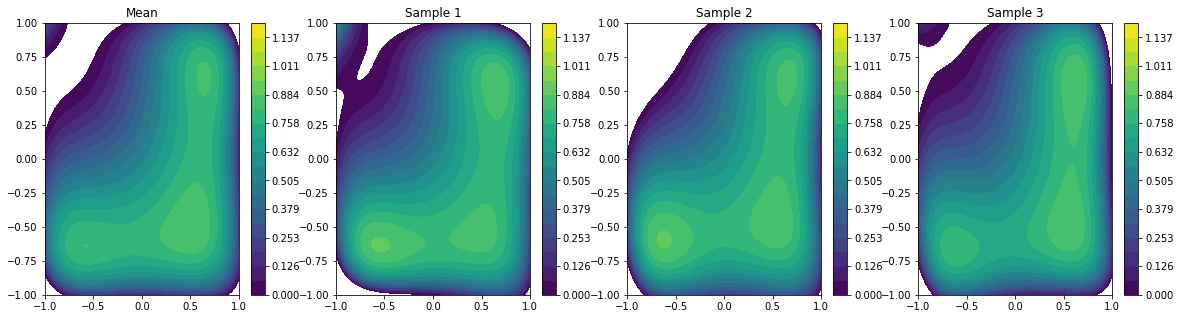

Bias = 0.009972187609229336  Variance = 0.006650645574850246  MSE = 0.016622833184079585
Degree= 8 lambda= 10.0


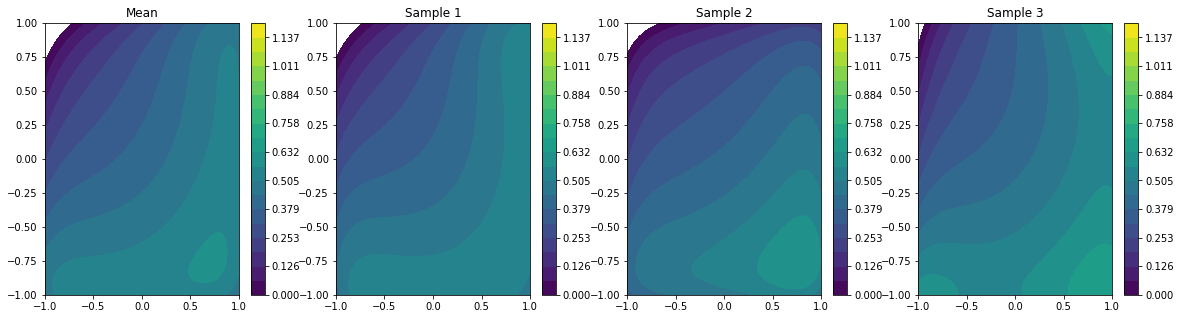

Bias = 0.05665929739848427  Variance = 0.0024612172871257823  MSE = 0.059120514685610054
Degree= 8 lambda= 1000.0


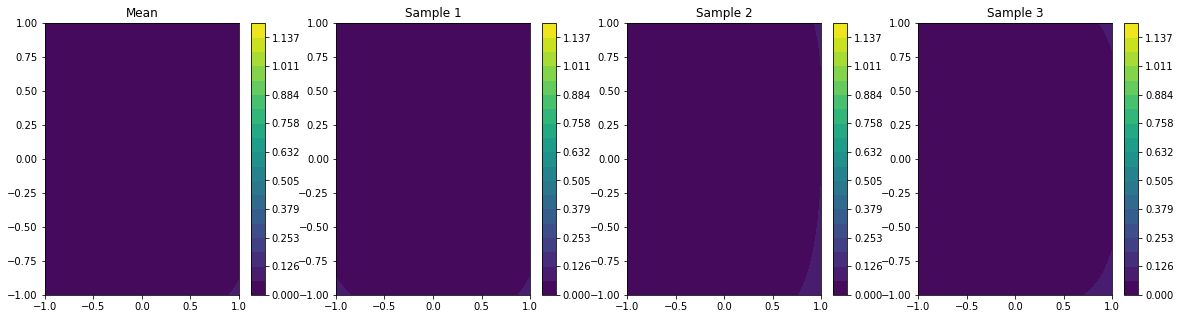

Bias = 0.301917555182571  Variance = 1.450522261221331e-05  MSE = 0.30193206040518333
Degree= 16 lambda= 1e-07


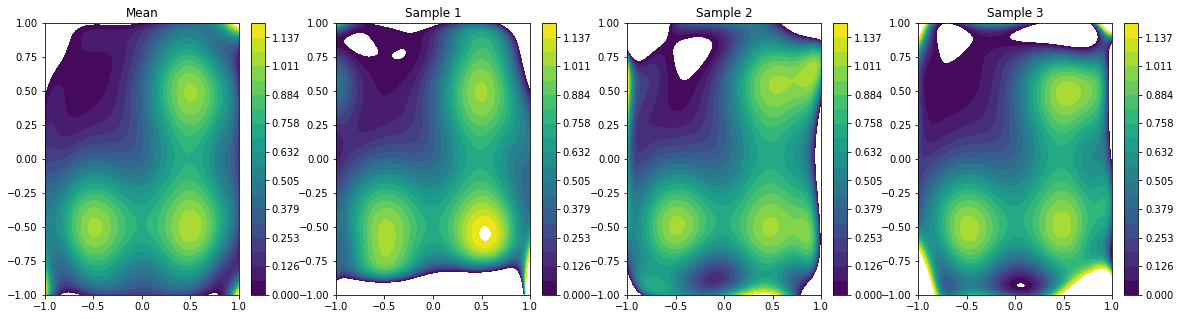

Bias = 0.00949463399435063  Variance = 0.39836786853797523  MSE = 0.4078625025323256
Degree= 16 lambda= 1e-05


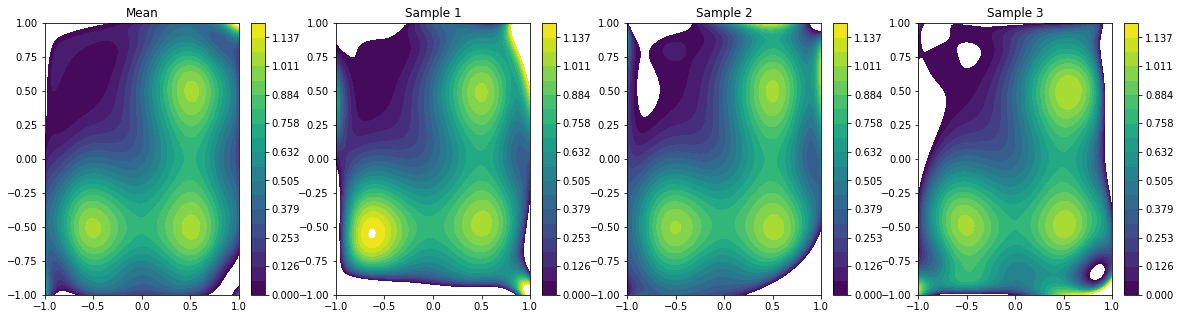

Bias = 0.008256722956022861  Variance = 0.17887869694733485  MSE = 0.1871354199033577
Degree= 16 lambda= 0.001


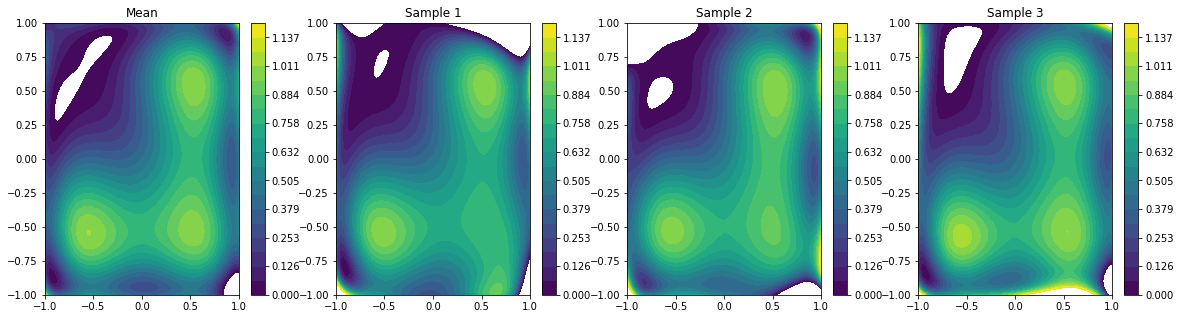

Bias = 0.006050700678144668  Variance = 0.06221812058438054  MSE = 0.06826882126252516
Degree= 16 lambda= 0.1


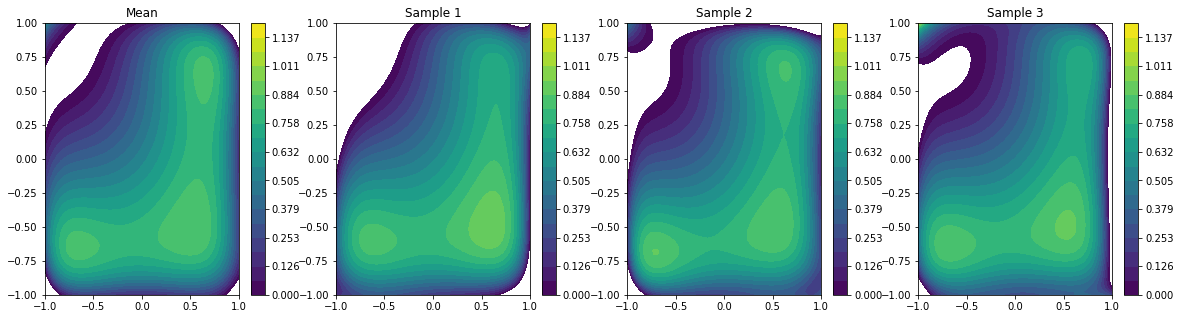

Bias = 0.011540228354345095  Variance = 0.011800851777150161  MSE = 0.02334108013149527
Degree= 16 lambda= 10.0


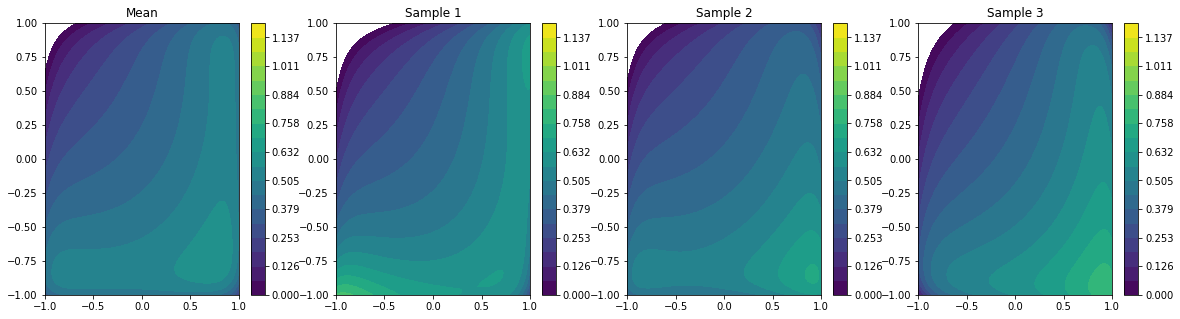

Bias = 0.05382821111192179  Variance = 0.002723273344237371  MSE = 0.05655148445615914
Degree= 16 lambda= 1000.0


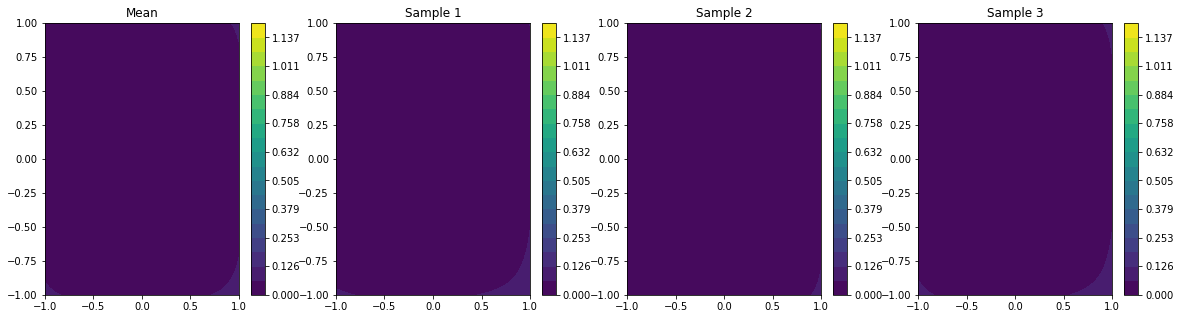

Bias = 0.3008719892867764  Variance = 1.7549990580709226e-05  MSE = 0.30088953927735723


In [44]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    d_prime = (degree+2)*(degree+1)//2
    n = len(X_test)
    phi = np.zeros((n,d_prime))
    index = 0
    
    
    #Here we write the code for dimension=2
    for i in range(degree+1):
        for j in range(degree-i+1):
            phi[:,index] = (X_test[:,0]**j)*(X_test[:,1]**i)
            index+=1
    del X_test
    Y_test_pred = phi@wt_vector
    
    return Y_test_pred
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    
    z = polynomial_regression_ridge_pred(X_master, wt_vector, degree)
    Z = np.reshape(z,(n_y,n_x))
    
    plt.contourf(X_master[:,0].reshape((n_y,n_x)),X_master[:,1].reshape((n_y,n_x)),Z,levels=np.linspace(0.,1.2,20))
    plt.title(title)
    plt.colorbar()


def polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    d_prime = (degree+2)*(degree+1)//2
    n = len(X_train)
    
    phi = np.zeros((n,d_prime))
    index = 0
    
    #Here we write the code for dimension=2
    for i in range(degree+1):
        for j in range(degree-i+1):
            phi[:,index] = (X_train[:,0]**j)*(X_train[:,1]**i)
            index+=1
    del X_train
    
    if (d_prime<n):
        w = (np.linalg.inv((phi.T)@(phi)+reg_param*np.eye(d_prime)))@(phi.T)@Y_train
    else:
        w = (phi.T)@(np.linalg.inv((phi)@(phi.T)+reg_param*np.eye(n)))@Y_train
        
    return w
    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    
    #Here we have d' = (k+d) choose d. k is degree, d is dimensionality(2 here).
    #For k>8, Representer theorem should be used since n = 50 and (9+2)choose 2 = 55.
    
    d_prime = (degree+2)*(degree+1)//2  
    n_iter = 100
    
    w = np.zeros((n_iter,d_prime))
    sum_sqerr = 0
    
    # Compute w and MSE.
    
    for i in range(n_iter):
        rand_index = np.random.choice(n_x*n_y,num_training_samples,replace=False)
        X_train = X_master[rand_index,:]
        Y_train = Y_master[rand_index,:]
        
        w[i] = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)[:,0]
        
        temp = polynomial_regression_ridge_pred(X_master, w[i], degree)
        
        for k in range(len(temp)):
            temp[k] = (Y_master[k]-temp[k])**2
        
        sum_sqerr+= np.mean(temp)
        del temp
    
    mse = (1/n_iter)*sum_sqerr
    
    del sum_sqerr
    
    w_mean = np.mean(w,axis=0)
    w_diff = (w-np.reshape(np.tile(w_mean,n_iter),(n_iter,d_prime)))
    w_plot = w[0:3]
    
    del w, X_train, Y_train
    
    # Compute variance
    sum_var = 0
    for i in range(n_iter):
        temp_pred = polynomial_regression_ridge_pred(X_master, w_diff[i],degree)
        
        for k in range(len(temp_pred)):
            temp_pred[k] = temp_pred[k]**2
        
        sum_var+=np.mean(temp_pred)
        del temp_pred
    
    var = (1/n_iter)*sum_var
    del sum_var, w_diff
    
    # Compute bias
    temp_bias = polynomial_regression_ridge_pred(X_master, w_mean,degree)
    for k in range(len(temp_bias)):
        temp_bias[k] = (Y_master[k]-temp_bias[k])**2
    
    bias = np.mean(temp_bias)
    del temp_bias
    
    
    # Plot mean function and 3 others as contour plots
    fig = plt.figure(figsize=(20,5))
    fig.add_subplot(1,4,1)
    visualise_polynomial_2d(w_mean, degree, title="Mean")
    fig.add_subplot(1,4,2)
    visualise_polynomial_2d(w_plot[0], degree, title="Sample 1")
    fig.add_subplot(1,4,3)
    visualise_polynomial_2d(w_plot[1], degree, title="Sample 2")
    fig.add_subplot(1,4,4)
    visualise_polynomial_2d(w_plot[2], degree, title="Sample 3")
    plt.show()
    
    return bias, var, mse

global n_x, n_y
n_x = 100
n_y = 100
    
x = np.linspace(-1,1,n_x)
y = np.linspace(-1,1,n_y)
    
Y, X = np.meshgrid(y,x)
Z = np.exp(-4*((X-0.5)**2+(Y-0.5)**2))+np.exp(-4*((X+0.5)**2+(Y+0.5)**2))+np.exp(-4*((X-0.5)**2+(Y+0.5)**2))
    
x1 = np.reshape(X,(n_x*n_y,1))
del X, x
x2 = np.reshape(Y,(n_x*n_y,1))
del Y, y

global X_master, Y_master

X_master = np.c_[x1,x2]
del x1, x2
Y_master = np.reshape(Z,(n_x*n_y,1))
del Z

Bmatrix = np.zeros((5,6))
Vmatrix = np.zeros((5,6))
Ematrix = np.zeros((5,6))

degree = [1,2,4,8,16]
reg_param = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]

for i in range(len(degree)):
    for j in range(len(reg_param)):
        #plt.figure()
        
        print('================================')
        print('Degree= '+str(degree[i])+' lambda= '+str(reg_param[j]))
        b,v,e = compute_BV_error_sample_plot(degree[i], reg_param[j])
        
        Bmatrix[i,j] = b
        Vmatrix[i,j] = v
        Ematrix[i,j] = e
        
        print('Bias = '+str(b),end="  ")
        print('Variance = '+str(v),end="  ")
        print('MSE = '+str(e))
del X_master, Y_master

In [45]:
print('Bias\n')
print(Bmatrix)
print('\n')
print('Variance\n')
print(Vmatrix)
print('\n')
print('MSE\n')
print(Ematrix)
print('\n')
print('Bias+Variance-MSE')
print('\n')
print(Bmatrix-Vmatrix-Ematrix)

Bias

[[0.05517448 0.05509121 0.05516618 0.05512168 0.0668047  0.30803043]
 [0.03472684 0.03462405 0.03464251 0.03447913 0.06283093 0.30388394]
 [0.00787021 0.00779896 0.00733844 0.00931652 0.06021796 0.30255339]
 [0.00590936 0.00494278 0.00560402 0.00997219 0.0566593  0.30191756]
 [0.00949463 0.00825672 0.0060507  0.01154023 0.05382821 0.30087199]]


Variance

[[3.34815602e-03 3.84646574e-03 4.16942310e-03 3.23742844e-03
  1.60748892e-03 7.10972569e-06]
 [5.95461773e-03 5.45048335e-03 5.27304437e-03 5.26974083e-03
  1.90353607e-03 7.44938815e-06]
 [8.49405724e-03 8.86377214e-03 6.86566383e-03 4.19502612e-03
  1.99535925e-03 1.08561949e-05]
 [2.06818225e-01 5.79543976e-02 2.09638003e-02 6.65064557e-03
  2.46121729e-03 1.45052226e-05]
 [3.98367869e-01 1.78878697e-01 6.22181206e-02 1.18008518e-02
  2.72327334e-03 1.75499906e-05]]


MSE

[[0.05852264 0.05893767 0.05933561 0.05835911 0.06841219 0.30803754]
 [0.04068146 0.04007454 0.03991555 0.03974887 0.06473447 0.30389139]
 [0.01636426 0.

From the above code output for Bias, Variance, MSE and their difference we can conclude that Bias and Variance indeed add approximately to MSE.

Also Variance is high for low regularisation parameter while bias is high for high regularisation parameter

Also we can see that for a fixed regularisation parameter, bias decreases with degree, with the opposite true for variance.

The original data is a sum of gaussians with different means. From contour plots we can see the peaks forming near the means given for degrees above four.

Bias matrix:

| Degree/Regularisation parameter | 1e-7     | 1e-5     | 1e-3     | 1e-1     | 1e1      | 1e3      |
|---------------------------------|----------|----------|----------|----------|----------|----------|
| 1                               |0.05523691|0.05513724|0.05512759|0.05516623|0.06786538|0.30775631|
| 2                               |0.03477522|0.034689  |0.03489363|0.03467223|0.06181313|0.30402919|
| 4                               |0.00803873|0.00727192|0.00743038|0.00925042|0.05991961|0.30278435|
| 8                               |0.00803873|0.00727192|0.00743038|0.00925042|0.05991961|0.30278435|
| 16                              |0.02125635|0.00914187|0.00549947|0.01098199|0.05438375|0.30117669|

Variance Matrix:

|Degree/Reg| 1e-7         | 1e-5         | 1e-3         | 1e-1         | 1e1          | 1e3          |
|----------|--------------|--------------|--------------|--------------|--------------|--------------|
| 1        |3.27294726e-03|3.85098308e-03|3.71733663e-03|3.68115661e-03|1.58058928e-03|8.27008969e-06|
| 2        |5.27532893e-03|5.10935296e-03|6.27148818e-03|5.12787418e-03|1.81487546e-03|6.42521762e-06|
| 4        |8.95614151e-03|9.71562607e-03|6.58185878e-03|3.50141926e-03|2.09434861e-03|1.01832190e-05|
| 8        |2.16951988e-01|5.85556530e-02|2.58557892e-02|6.27254195e-03|2.31710485e-03|1.19269473e-05|
| 16       |3.47098704e-01|1.46829413e-01|5.85098611e-02|1.05301824e-02|2.45300784e-03|1.90444216e-05


** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




Number of training points = 50


Train squared error


[[2.50383124e-01 2.50383124e-01 2.50383124e-01 2.50383124e-01
  2.50384416e-01 2.55897830e-01]
 [1.34111598e-01 1.34111598e-01 1.34111598e-01 1.34111609e-01
  1.34213059e-01 1.97482699e-01]
 [1.02018315e-01 1.02018315e-01 1.02018315e-01 1.02019456e-01
  1.04106649e-01 1.80637925e-01]
 [1.32732739e-04 1.99157118e-04 1.07657812e-02 4.17213446e-02
  8.19909925e-02 1.63199702e-01]
 [1.95656371e-08 9.36700101e-06 1.31769315e-03 3.11130925e-02
  7.00207055e-02 1.50012860e-01]]


Test squared error


[[3.01266818e-01 3.01266817e-01 3.01266774e-01 3.01262496e-01
  3.00838224e-01 2.78350694e-01]
 [1.57899989e-01 1.57899987e-01 1.57899852e-01 1.57886318e-01
  1.56735259e-01 2.08223641e-01]
 [1.57333966e-01 1.57333956e-01 1.57332950e-01 1.57242781e-01
  1.61826388e-01 1.96568595e-01]
 [2.37690057e+02 1.72501862e+02 1.85942539e+01 9.90250753e-01
  1.65155762e-01 1.93918588e-01]
 [2.50521991e+02 2.32024825e+02 6.66976843e+01 2.33730833e+00
  2.

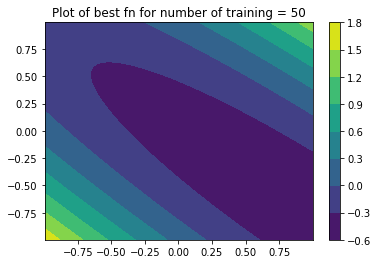

Number of training points = 100


Train squared error


[[2.58091013e-01 2.58091013e-01 2.58091013e-01 2.58091013e-01
  2.58091118e-01 2.58739875e-01]
 [1.30950628e-01 1.30950628e-01 1.30950628e-01 1.30950629e-01
  1.30966088e-01 1.64967761e-01]
 [1.13026638e-01 1.13026638e-01 1.13026638e-01 1.13026750e-01
  1.13651412e-01 1.52373489e-01]
 [4.15879264e-02 4.15879375e-02 4.16800394e-02 5.80084664e-02
  9.29016057e-02 1.44885696e-01]
 [7.73449898e-06 4.83966901e-04 7.54402392e-03 4.17291847e-02
  8.36969425e-02 1.39543838e-01]]


Test squared error


[[ 0.27314864  0.27314864  0.27314863  0.27314798  0.27308304  0.26862154]
 [ 0.15320993  0.15320993  0.1532099   0.15320678  0.15291576  0.17570948]
 [ 0.14277575  0.14277576  0.14277607  0.14280764  0.14602043  0.16898019]
 [ 0.71291635  0.71131963  0.58075914  0.20363826  0.16262758  0.17116844]
 [54.07997871 11.77041976 23.41658886  0.41784851  0.18835914  0.17415997]]


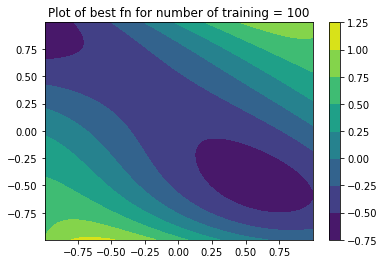

Number of training points = 200


Train squared error


[[2.46535074e-01 2.46535074e-01 2.46535074e-01 2.46535074e-01
  2.46535088e-01 2.46641154e-01]
 [1.33665326e-01 1.33665326e-01 1.33665326e-01 1.33665326e-01
  1.33668660e-01 1.47549038e-01]
 [1.13338156e-01 1.13338156e-01 1.13338156e-01 1.13338187e-01
  1.13589893e-01 1.44444404e-01]
 [6.17373223e-02 6.17373224e-02 6.17381009e-02 6.39497323e-02
  9.56872307e-02 1.41192792e-01]
 [2.88166899e-05 1.08543158e-03 1.13255643e-02 4.44632675e-02
  8.34995667e-02 1.33762599e-01]]


Test squared error


[[0.26766305 0.26766305 0.26766305 0.26766288 0.26764571 0.26622547]
 [0.14578065 0.14578065 0.14578065 0.14578035 0.14575448 0.15868223]
 [0.13117097 0.13117097 0.1311709  0.13116415 0.13083053 0.15708512]
 [0.13736299 0.13735918 0.13698205 0.11818259 0.11396536 0.15645118]
 [0.03714998 0.08371021 0.17080666 0.0869037  0.11121403 0.15224401]]


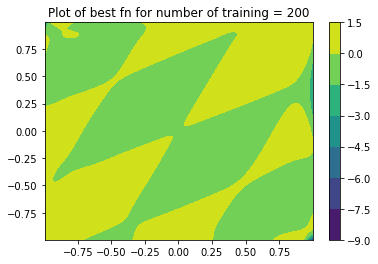

Number of training points = 1000


Train squared error


[[2.40728219e-01 2.40728219e-01 2.40728219e-01 2.40728219e-01
  2.40728219e-01 2.40728718e-01]
 [1.38824103e-01 1.38824103e-01 1.38824103e-01 1.38824103e-01
  1.38824212e-01 1.39718023e-01]
 [1.25017242e-01 1.25017242e-01 1.25017242e-01 1.25017243e-01
  1.25025116e-01 1.34172029e-01]
 [7.67428535e-02 7.67428535e-02 7.67428671e-02 7.68462164e-02
  9.48380319e-02 1.28438228e-01]
 [2.54867353e-05 4.45126882e-04 6.53349064e-03 3.84153399e-02
  8.49925763e-02 1.21687324e-01]]


Test squared error


[[0.26253465 0.26253465 0.26253465 0.26253465 0.2625346  0.2625303 ]
 [0.14242932 0.14242932 0.14242932 0.14242945 0.14244207 0.14451885]
 [0.12707963 0.12707963 0.12707964 0.12708121 0.12724209 0.14093659]
 [0.08481274 0.08481261 0.08480025 0.08391324 0.09782269 0.13498892]
 [0.00119772 0.00149007 0.01095719 0.04965813 0.0907374  0.1278209 ]]


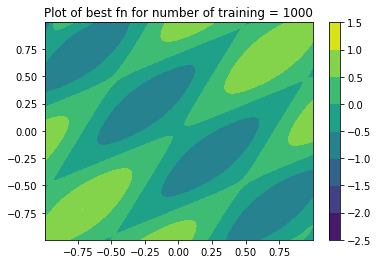

Best degrees and reg params are

Number of training points = 50
Degree =  2
Regularisation parameter =  0.1
Number of training points = 100
Degree =  4
Regularisation parameter =  1e-09
Number of training points = 200
Degree =  16
Regularisation parameter =  1e-09
Number of training points = 1000
Degree =  16
Regularisation parameter =  1e-09


In [46]:
# Cell type : CodeWrite 
data = np.load('dataset4_1.npz')
lst = data.files
X_train = data[lst[0]]
Y_train = data[lst[1]]
X_test = data[lst[2]]
Y_test = data[lst[3]]

margin = 1
x1min = np.min(X_train[:,0])
x1max = np.max(X_train[:,0])
x2min = np.min(X_train[:,1])
x2max = np.max(X_train[:,1])


num_train = [50,100,200,1000]
degree = [1,2,4,8,16]
reg_param = [1e-9,1e-7,1e-5,1e-3,1e-1,1e1]

train_sq_err = np.zeros((len(num_train),len(degree),len(reg_param)))
test_sq_err = np.zeros((len(num_train),len(degree),len(reg_param)))

for k in range(len(num_train)):
    for i in range(len(degree)):
        for j in range(len(reg_param)):
            
            w = polynomial_regression_ridge_train(X_train[0:num_train[k],:], Y_train[0:num_train[k]], degree[i], reg_param[j])
            
            # The training data is only for rows till num_train, hence only that used for train err
            Y_train_pred = polynomial_regression_ridge_pred(X_train[0:num_train[k],:], w, degree[i])
            train_sq_err[k,i,j] = np.mean((Y_train_pred-Y_train[0:num_train[k]])**2)
            del Y_train_pred
            
            Y_test_pred = polynomial_regression_ridge_pred(X_test,w,degree[i])
            test_sq_err[k,i,j] = np.mean((Y_test_pred-Y_test)**2)
            del Y_test_pred

index = np.zeros((len(num_train),2))

for k in range(len(num_train)):
    print('=======================')
    print('Number of training points = '+str(num_train[k]))
    print('\n')
    print('Train squared error')
    print('\n')
    print(train_sq_err[k])
    print('\n')
    print('Test squared error')
    print('\n')
    print(test_sq_err[k])
    
    ind = np.unravel_index(np.argmin(test_sq_err[k], axis=None), test_sq_err[k].shape)
    deg = degree[ind[0]]
    reg = reg_param[ind[1]]
    index[k] = ind
    w = polynomial_regression_ridge_train(X_train[0:num_train[k],:], Y_train[0:num_train[k]], deg, reg)
    
    X,Y = np.meshgrid(np.linspace(x1min,x1max,100),np.linspace(x2min,x2max,100))
    X1 = X.reshape((100*100,1))
    X2 = Y.reshape((100*100,1))
    Z = polynomial_regression_ridge_pred(np.c_[X1,X2], w, deg)
    Z = Z.reshape((100,100))
    plt.contourf(X,Y,Z)
    plt.title('Plot of best fn for number of training = '+str(num_train[k]))
    plt.colorbar()
    plt.show()

print('Best degrees and reg params are\n')
for k in range(len(num_train)):
    print('Number of training points = '+str(num_train[k]))
    print('Degree = ',end = " ")
    print(degree[int(index[k,0])])
    print('Regularisation parameter = ', end=" ")
    print(reg_param[int(index[k,1])])
    


## Obervations:

After choosing the hyper parameters, we find that:
1. As the number of training points increases, the chosen hyper parameter usually corresponds to a higher degree. This is expected because if training points are low, the algorithm tends to overfit when using a higher degree polynomial.
2. This points to a nice conclusion: Even when we may not be able to perform bias variance analysis to determine the hyperparameters, using a validation dataset gives nice choices for the hyperparameters. the bigger the size of hyperparameters, more validation data is required.

## Tables
Number of train points = 50

##### Train squared error

|Degree/Lambda|  1e-9  |  1e-7  | 1e-5  | 1e-3 | 1e-1 | 1e1  |
|------------:|-------:|-------:|------:|-----:|-----:|-----:|
|            1|  0.3013|  0.3013| 0.3013|0.3013|0.3008|0.2784|
|            2|  0.1579|  0.1579| 0.1579|0.1579|0.1567|0.2082|
|            4|  0.1573|  0.1573| 0.1573|0.1572|0.1618|0.1966|
|            8|237.6901|172.5019|18.5943|0.9903|0.1652|0.1939|
|           16|250.5220|232.0248|66.6977|2.3373|0.2040|0.1961|

##### Test squared error

|Degree/Lambda|  1e-9  |  1e-7  |  1e-5  | 1e-3  | 1e-1  | 1e1  |
|------------:|-------:|-------:|-------:|------:|------:|-----:|
|            1|0.250383|0.250383|0.250383|0.25038|0.25038|0.2559|
|            2|0.134112|0.134112|0.134112|0.13411|0.13421|0.1975|
|            4|0.102018|0.102018|0.102018|0.10202|0.10411|0.1806|
|            8|0.000133|0.000199|0.010766|0.04172|0.08199|0.1632|
|           16|0.000000|0.000009|0.001318|0.03111|0.07002|0.1500|

Number of train points = 100

##### Train squared error

|Degree/Lambda| 1e-9  | 1e-7  | 1e-5  | 1e-3 | 1e-1 | 1e1  |
|------------:|------:|------:|------:|-----:|-----:|-----:|
|            1| 0.2731| 0.2731| 0.2731|0.2731|0.2731|0.2686|
|            2| 0.1532| 0.1532| 0.1532|0.1532|0.1529|0.1757|
|            4| 0.1428| 0.1428| 0.1428|0.1428|0.1460|0.1690|
|            8| 0.7129| 0.7113| 0.5808|0.2036|0.1626|0.1712|
|           16|54.0800|11.7704|23.4166|0.4178|0.1884|0.1742|

##### Test squared error

|Degree/Lambda|  1e-9  |  1e-7  |  1e-5  | 1e-3  | 1e-1  | 1e1  |
|------------:|-------:|-------:|-------:|------:|------:|-----:|
|            1|0.258091|0.258091|0.258091|0.25809|0.25809|0.2587|
|            2|0.130951|0.130951|0.130951|0.13095|0.13097|0.1650|
|            4|0.113027|0.113027|0.113027|0.11303|0.11365|0.1524|
|            8|0.041588|0.041588|0.041680|0.05801|0.09290|0.1449|
|           16|0.000008|0.000484|0.007544|0.04173|0.08370|0.1395|

Number of train points = 200

##### Train squared error

|Degree/Lambda| 1e-9  | 1e-7  | 1e-5 | 1e-3  | 1e-1 | 1e1  |
|------------:|------:|------:|-----:|------:|-----:|-----:|
|            1|0.26766|0.26766|0.2677|0.26766|0.2676|0.2662|
|            2|0.14578|0.14578|0.1458|0.14578|0.1458|0.1587|
|            4|0.13117|0.13117|0.1312|0.13116|0.1308|0.1571|
|            8|0.13736|0.13736|0.1370|0.11818|0.1140|0.1565|
|           16|0.03715|0.08371|0.1708|0.08690|0.1112|0.1522|

##### Test squared error

|Degree/Lambda|  1e-9  |  1e-7  | 1e-5  | 1e-3  | 1e-1  | 1e1  |
|------------:|-------:|-------:|------:|------:|------:|-----:|
|            1|0.246535|0.246535|0.24654|0.24654|0.24654|0.2466|
|            2|0.133665|0.133665|0.13367|0.13367|0.13367|0.1475|
|            4|0.113338|0.113338|0.11334|0.11334|0.11359|0.1444|
|            8|0.061737|0.061737|0.06174|0.06395|0.09569|0.1412|
|           16|0.000029|0.001085|0.01133|0.04446|0.08350|0.1338|

Number of train points = 1000

##### Train squared error

|Degree/Lambda|  1e-9  |  1e-7  | 1e-5  | 1e-3  | 1e-1  | 1e1  |
|------------:|-------:|-------:|------:|------:|------:|-----:|
|            1|0.262535|0.262535|0.26253|0.26253|0.26253|0.2625|
|            2|0.142429|0.142429|0.14243|0.14243|0.14244|0.1445|
|            4|0.127080|0.127080|0.12708|0.12708|0.12724|0.1409|
|            8|0.084813|0.084813|0.08480|0.08391|0.09782|0.1350|
|           16|0.001198|0.001490|0.01096|0.04966|0.09074|0.1278|

##### Test squared error
|Degree/Lambda|  1e-9  |  1e-7  |  1e-5  | 1e-3  | 1e-1  | 1e1  |
|------------:|-------:|-------:|-------:|------:|------:|-----:|
|            1|0.240728|0.240728|0.240728|0.24073|0.24073|0.2407|
|            2|0.138824|0.138824|0.138824|0.13882|0.13882|0.1397|
|            4|0.125017|0.125017|0.125017|0.12502|0.12503|0.1342|
|            8|0.076743|0.076743|0.076743|0.07685|0.09484|0.1284|
|           16|0.000025|0.000445|0.006533|0.03842|0.08499|0.1217|



** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












4 Points


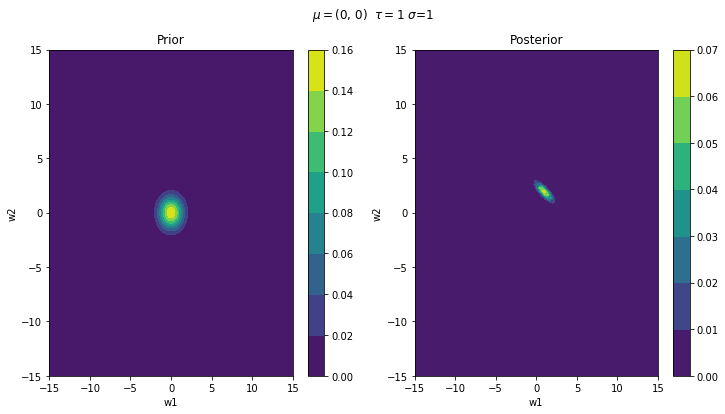

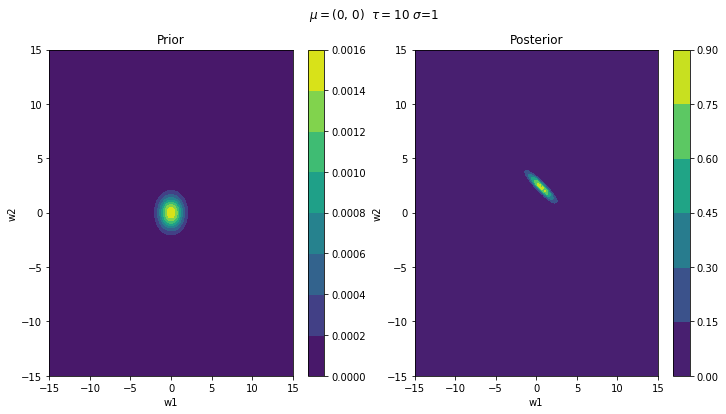

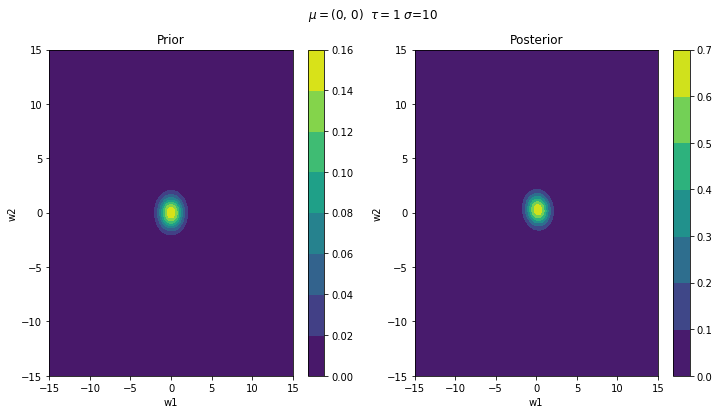

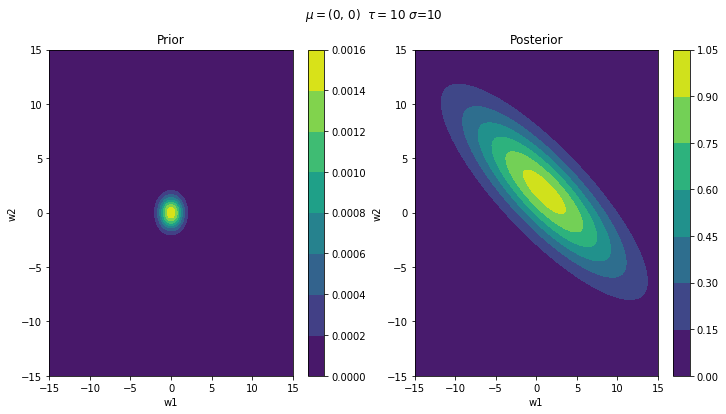

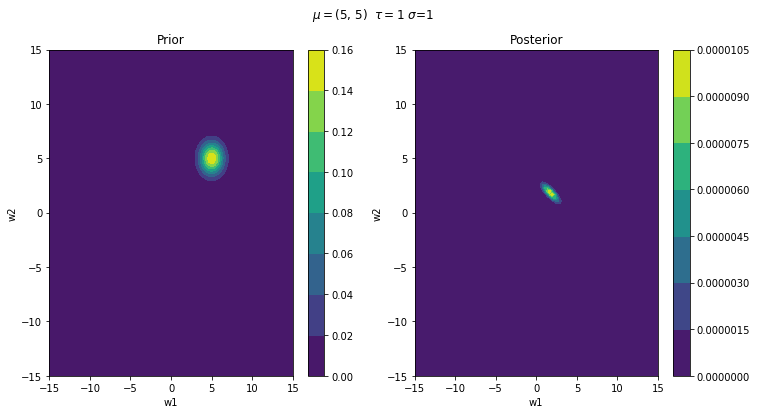

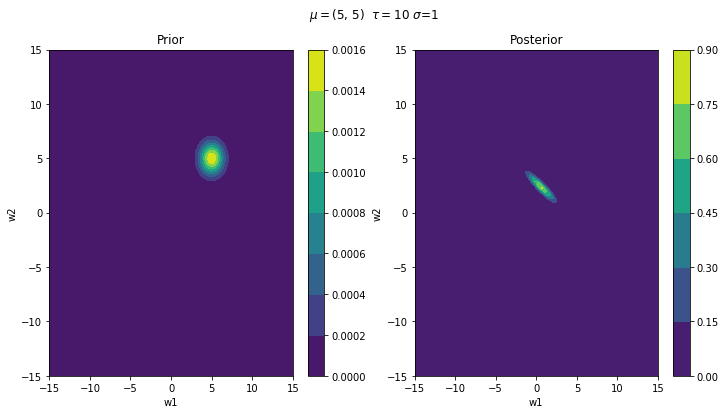

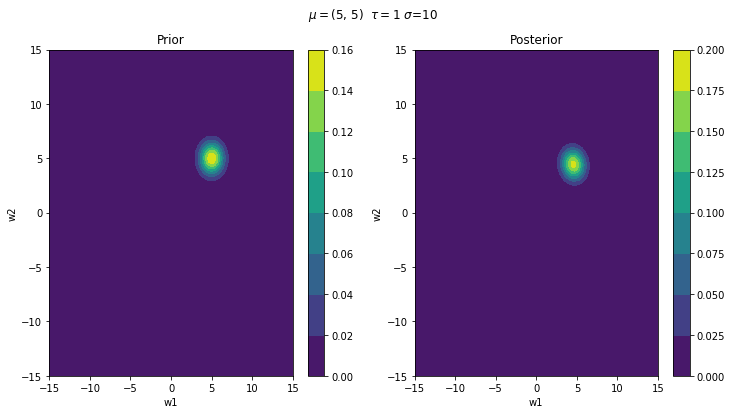

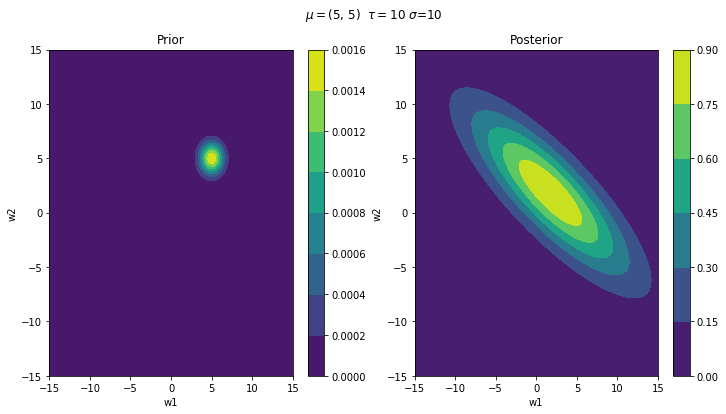





400 points


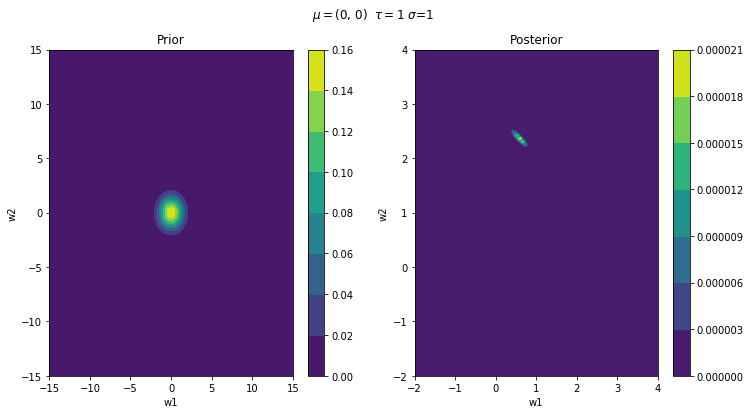

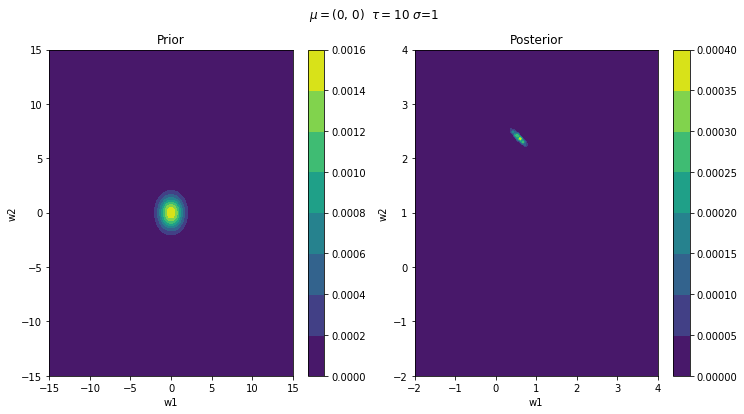

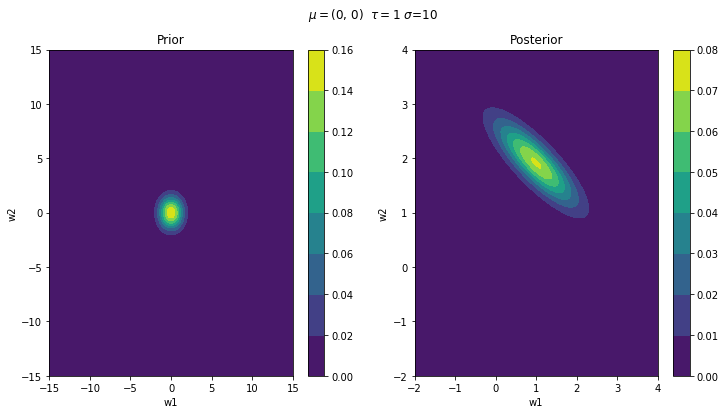

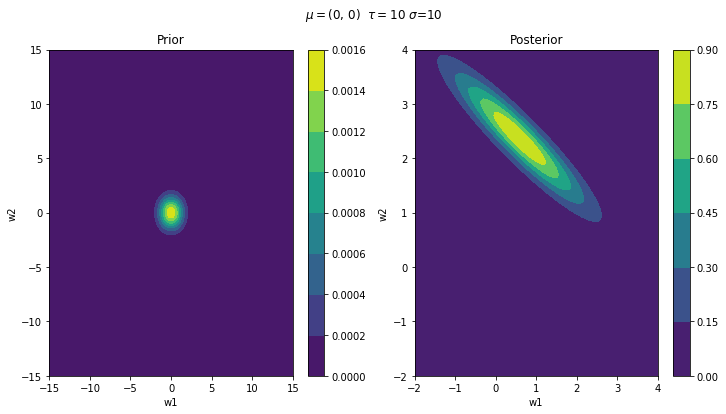

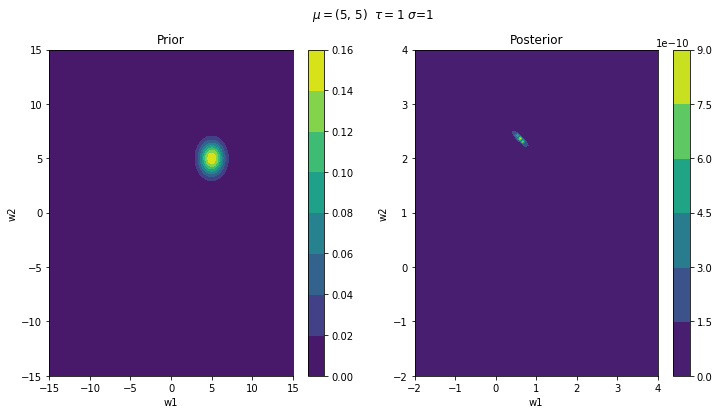

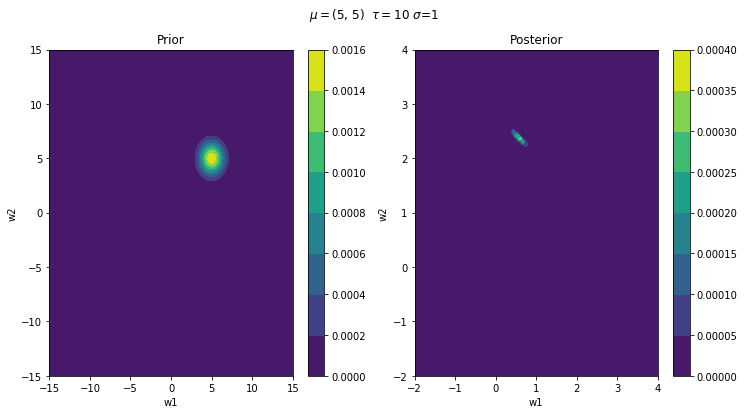

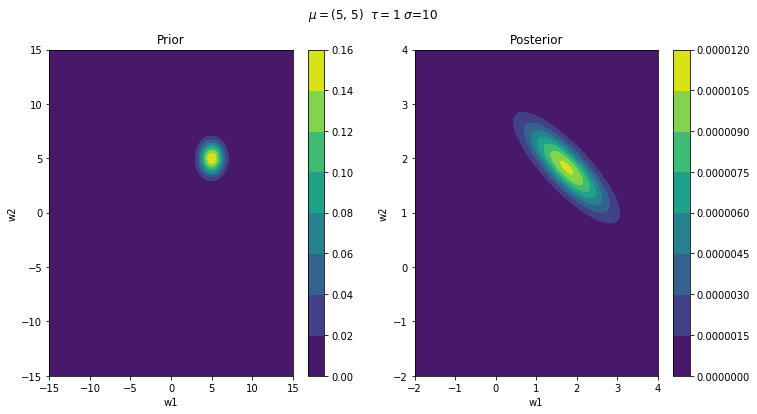

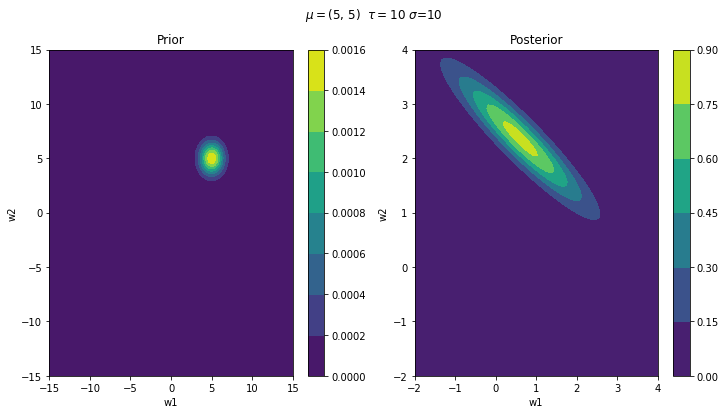

In [47]:
def prior_distribution(w,mu,tau):
    d = len(w[0])
    n = len(w)
    
    exp = (1/tau*tau)*(np.linalg.norm((w-mu),axis=1)**2)
    
    y = (1/(np.sqrt(2*np.pi*tau*tau))**d)*np.exp(-0.5*exp)
    return y
    
def posterior_distribution(w,mu,tau,sigma,data_pts):
    
    d = len(w[0])
    n = len(w)
    
    x = data_pts[:,0:d]
    y = data_pts[:,-1]
    l = len(data_pts)
    
    norm_sq = np.zeros(n)
    
    for i in range(n):
        norm_sq[i] = (np.linalg.norm(w[i]@(x.T)-y))**2
    
    exp1 = np.sum((y-w@x.T)**2,axis=1)/(sigma*sigma)
    
    exp2 = (1/(tau*tau))*(np.linalg.norm((w-mu),axis=1)**2)
    
    out = np.exp(-0.5*exp1)*np.exp(-0.5*exp2)
    
    norm_const = np.sum(out)
    value = (1/norm_const)*out
    return out

def plot_contour(wpr,wpos,n_x,n_y,mu,sigma,tau,data_pts):
    #Assumed: d = 2
    W1pr = wpr[:,0].reshape((n_y,n_x))
    W2pr = wpr[:,1].reshape((n_y,n_x))
    
    W1pos = wpos[:,0].reshape((n_y,n_x))
    W2pos = wpos[:,1].reshape((n_y,n_x))
    
    prior_values = prior_distribution(wpr,mu,tau)
    post_values = posterior_distribution(wpos,mu,tau,sigma,data_pts)
    
    Prior_Values = prior_values.reshape((n_y,n_x))    
    Post_Values = post_values.reshape((n_y,n_x))
    
    fig = plt.figure(figsize=(12,6))
    fig.add_subplot(121)
    im1 = plt.contourf(W1pr,W2pr,Prior_Values)
    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.title('Prior')
    plt.colorbar(im1)
    
    fig.add_subplot(122)
    im2 = plt.contourf(W1pos,W2pos,Post_Values)
    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.title('Posterior')
    plt.colorbar(im2)
    
    #plt.title(r'$ \mu = ($'+str(mu[0])+', '+str(mu[1])+ r'$)+\tau=$'str(tau)+r'$, \sigma=$'+str(sigma))
    plt.suptitle(r'$\mu= ($'+str(mu[0])+', '+str(mu[1])+')  '+r'$\tau= $'+str(tau)+' '+r'$ \sigma$='+str(sigma))
    plt.show()
    
n_x = 100
n_y = 100

w1pr = np.linspace(-15,15,n_x)
w2pr = np.linspace(-15,15,n_y)

W2pr, W1pr = np.meshgrid(w2pr,w1pr)

w2pr = np.reshape(W2pr,(n_x*n_y,1))
w1pr = np.reshape(W1pr,(n_x*n_y,1))
wpr = np.c_[w1pr,w2pr]

w1pos = np.linspace(-15,15,n_x)
w2pos = np.linspace(-15,15,n_y)

W2pos, W1pos = np.meshgrid(w2pos,w1pos)

w2pos = np.reshape(W2pos,(n_x*n_y,1))
w1pos = np.reshape(W1pos,(n_x*n_y,1))
wpos = np.c_[w1pos,w2pos]

data_pts1 = np.array([[1.0,2.0,5.1],[2.0,2.1,6.1],[0.6,1.5,4.2],[1.1,0.9,2.9]])

sigma = np.array([1,1,10,10,1,1,10,10])
tau = np.array([1,10,1,10,1,10,1,10])
mu = np.array([[0,0],[0,0],[0,0],[0,0],[5,5],[5,5],[5,5],[5,5]])
print('4 Points')
for i in range(8):
    plot_contour(wpr,wpos,n_x,n_y,mu[i],sigma[i],tau[i],data_pts1)
print('======================================================\n\n\n\n')
print('400 points')
n_x = 100
n_y = 100

w1pr = np.linspace(-15,15,n_x)
w2pr = np.linspace(-15,15,n_y)

W2pr, W1pr = np.meshgrid(w2pr,w1pr)

w2pr = np.reshape(W2pr,(n_x*n_y,1))
w1pr = np.reshape(W1pr,(n_x*n_y,1))
wpr = np.c_[w1pr,w2pr]

w1pos = np.linspace(-2,4,n_x)
w2pos = np.linspace(-2,4,n_y)

W2pos, W1pos = np.meshgrid(w2pos,w1pos)

w2pos = np.reshape(W2pos,(n_x*n_y,1))
w1pos = np.reshape(W1pos,(n_x*n_y,1))
wpos = np.c_[w1pos,w2pos]


sigma = np.array([1,1,10,10,1,1,10,10])
tau = np.array([1,10,1,10,1,10,1,10])
mu = np.array([[0,0],[0,0],[0,0],[0,0],[5,5],[5,5],[5,5],[5,5]])


data_pts2 = np.tile(data_pts1,100).reshape((100*4,3))

for i in range(8):
    plot_contour(wpr,wpos,n_x,n_y,mu[i],sigma[i],tau[i],data_pts2)

## Observations:

1. For lesser number of points, the distribution is relatively more concentrated towards the prior distribution than  with more points.
2. For high $\sigma$ of the data, our prediction is closer to the prior, while for high values of $\tau$, the solution tends towards the LMSE case. Higher $\sigma$ means we trust the data lesser, while higher $\tau$ means we are looser in terms of priors
3. We observe that as we are fed the same points again and again, we overcome our prior biases, and the distribution becomes more concentrated about the optimal value.This can also be explained as the following: Noise adds in variance while signal adds in amplitude. As we are given repeated measurements, our estimates become closer to optimal value.